In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
from scipy.signal import find_peaks
import matplotlib.colors as colors
import qcodes.instrument_drivers.nplab_drivers as npd
from matplotlib.colors import SymLogNorm, LogNorm, DivergingNorm
import colorcet as cc
import os
from matplotlib import ticker
from scipy.interpolate import RectBivariateSpline
from scipy.ndimage import gaussian_filter

In [2]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'

In [3]:
font = {
                'family': 'Arial',
                'size': 12,
                'serif': 'Times',
                'sans-serif': 'Arial'
            }

plt.rc('font', **font)

In [4]:
cd ..

/Users/robertpolski/Documents/NPGroupResearch/Measurements/Triton/qcodes_data


In [5]:
qc.DataSet.default_io.base_location = os.path.abspath('.')

In [6]:
figfile = './Figures/200901_S3_graphs'

In [7]:
data_gate_W3 = qc.load_data('data/2020-09-02/#001_W3_865_7-8_baseT_1nA_gatesweep_10-43-13')

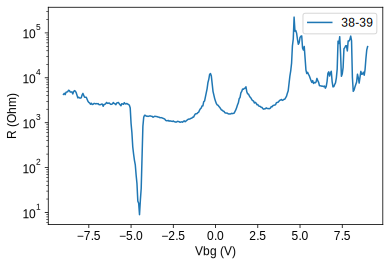

In [8]:
plt.figure()
plt.semilogy(data_gate_W3.srframe_volt_p1_set, npd.Rxxfromdata(data_gate_W3, 1e-9, 'lockin865'), label='38-39')
plt.xlabel('Vbg (V)')
plt.ylabel('R (Ohm)')
plt.legend()

# S3 gate curve of different contacts

In [9]:
data_gate1 = qc.load_data('data/2020-09-02/#005_S3_38-39_865_baseT_1nA_12-03-36')
data_gate2 = qc.load_data('data/2020-09-02/#006_S3_39-40_865_baseT_1nA_12-14-09')
data_gate3 = qc.load_data('data/2020-09-02/#007_S3_40-41_865_baseT_1nA_12-28-56')
data_gate4 = qc.load_data('data/2020-09-02/#009_S3_865_35-34_830_34-33_8302_33-32_1nA_13-18-25')

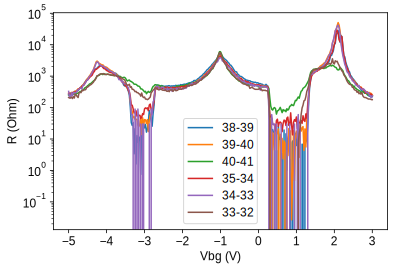

In [10]:
plt.figure()
plt.semilogy(data_gate1.srframe_volt_p1_set, npd.Rxxfromdata(data_gate1, 1e-9, 'lockin865'), label='38-39')
plt.semilogy(data_gate2.srframe_volt_p1_set, npd.Rxxfromdata(data_gate2, 1e-9, 'lockin865'), label='39-40')
plt.semilogy(data_gate3.srframe_volt_p1_set, npd.Rxxfromdata(data_gate3, 1e-9, 'lockin865'), label='40-41')
plt.semilogy(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin865'), label='35-34')
plt.semilogy(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830'), label='34-33')
plt.semilogy(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830_2'), label='33-32')
plt.xlabel('Vbg (V)')
plt.ylabel('R (Ohm)')
plt.legend()

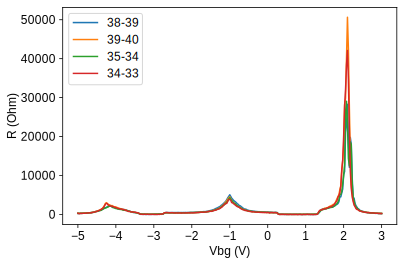

In [11]:
#
plt.figure()
plt.plot(data_gate1.srframe_volt_p1_set, npd.Rxxfromdata(data_gate1, 1e-9, 'lockin865'), label='38-39')
plt.plot(data_gate2.srframe_volt_p1_set, npd.Rxxfromdata(data_gate2, 1e-9, 'lockin865'), label='39-40')
#plt.plot(data_gate3.srframe_volt_p1_set, npd.Rxxfromdata(data_gate3, 1e-9, 'lockin865'), label='40-41')
plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin865'), label='35-34')
plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830'), label='34-33')
#plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830_2'), label='33-32')
plt.xlabel('Vbg (V)')
plt.ylabel('R (Ohm)')
plt.legend()

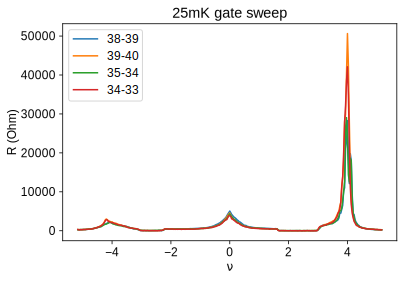

In [12]:
#
plt.figure()
plt.plot((data_gate1.srframe_volt_p1_set[:]+1)/3.1*4, npd.Rxxfromdata(data_gate1, 1e-9, 'lockin865'), label='38-39')
plt.plot((data_gate2.srframe_volt_p1_set[:]+1)/3.1*4, npd.Rxxfromdata(data_gate2, 1e-9, 'lockin865'), label='39-40')
#plt.plot(data_gate3.srframe_volt_p1_set, npd.Rxxfromdata(data_gate3, 1e-9, 'lockin865'), label='40-41')
plt.plot((data_gate4.srframe_volt_p5_set[:]+1)/3.1*4, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin865'), label='35-34')
plt.plot((data_gate4.srframe_volt_p5_set[:]+1)/3.1*4, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830'), label='34-33')
#plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830_2'), label='33-32')
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('25mK gate sweep')
plt.legend()

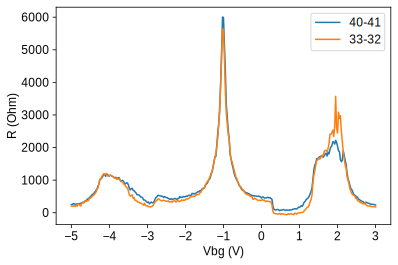

In [13]:
#
plt.figure()
#plt.plot(data_gate1.srframe_volt_p1_set, npd.Rxxfromdata(data_gate1, 1e-9, 'lockin865'), label='38-39')
#plt.plot(data_gate2.srframe_volt_p1_set, npd.Rxxfromdata(data_gate2, 1e-9, 'lockin865'), label='39-40')
plt.plot(data_gate3.srframe_volt_p1_set, npd.Rxxfromdata(data_gate3, 1e-9, 'lockin865'), label='40-41')
#plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin865'), label='35-34')
#plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830'), label='34-33')
plt.plot(data_gate4.srframe_volt_p5_set, npd.Rxxfromdata(data_gate4, 1e-9, 'lockin830_2'), label='33-32')
plt.xlabel('Vbg (V)')
plt.ylabel('R (Ohm)')
plt.legend()

# different contacts 2D gate sweep

In [13]:
d2d = qc.load_data('data/2020-09-02/#014_S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_fine_22-13-49')
vbg = d2d.srframe_volt_p1_set[0, :]
vtg = d2d.srframe_volt_p5_set[:]
Rxx3534 = npd.Rxxfromdata(d2d, 1e-9, 'lockin865')

<IPython.core.display.Javascript object>


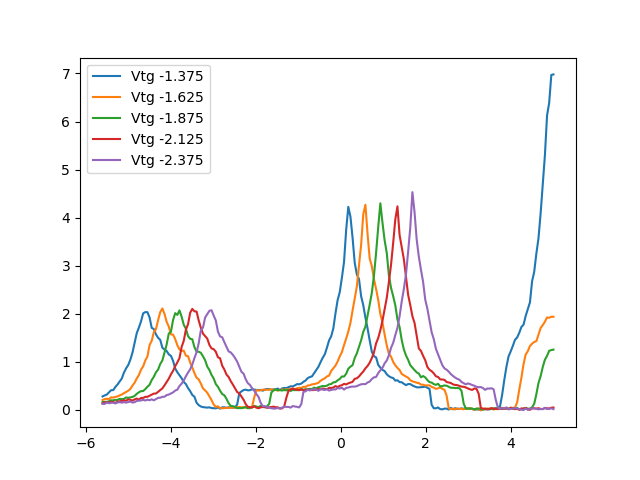

In [14]:
plt.figure()
for i in range(15, 20):
    indx=10*i + 25
    plt.plot(vbg, Rxx3534[indx, :]/1000, label='Vtg {}'.format(vtg[indx]))
    
plt.legend()

In [15]:
vbgvals = np.array([-5.483, -5.101, -4.735, -4.352, -3.961, -3.551, -3.190, -2.838, -2.446, -2.085, -1.689, -1.335, -0.954, -0.577, -0.177, 0.175, 0.573, 0.924, 1.322, 1.683])
vtgvals = np.linspace(2.375, -2.375, len(vbgvals))

zdens = np.polyfit(vbgvals, vtgvals, 1)  # The zero-density slope
#slope of constant electric field:
zfieldslope = -zdens[0]

In [16]:
print('zero-field slope (Vtg/Vbg): ', zfieldslope)

zero-field slope (Vtg/Vbg):  0.6629105490080421


<IPython.core.display.Javascript object>


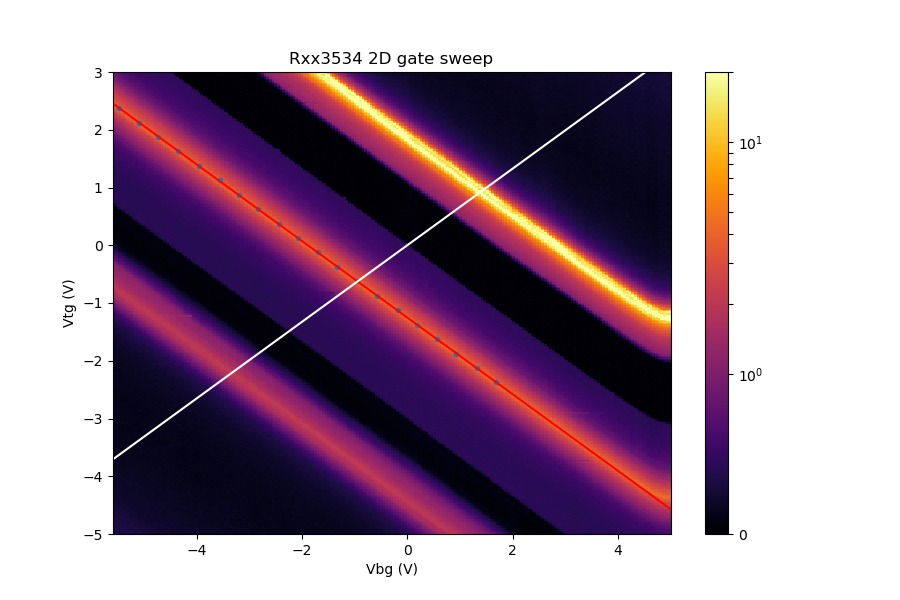

Text(0.5, 1.0, 'Rxx3534 2D gate sweep')

In [17]:
plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx3534/1000, cmap='inferno', norm=SymLogNorm(1, vmin=0, vmax=20))

plt.plot(vbgvals, vtgvals, '.')
x1 = np.array([-5.6, 5])
plt.plot(x1, x1*zdens[0] + zdens[1], 'r')
lim = plt.axis()
plt.plot(x1, x1*zfieldslope, 'w')

plt.xlabel('Vbg (V)')
plt.ylabel('Vtg (V)')
plt.colorbar()
plt.axis(lim)
plt.title('Rxx3534 2D gate sweep')

<IPython.core.display.Javascript object>


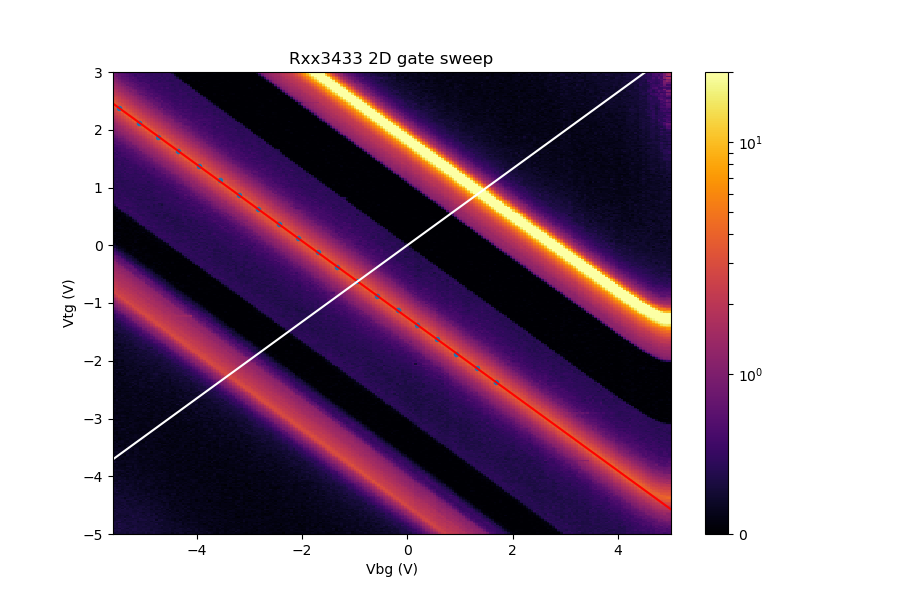

Text(0.5, 1.0, 'Rxx3433 2D gate sweep')

In [18]:
Rxx3433 = npd.Rxxfromdata(d2d, 1e-9, 'lockin830')

plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx3433/1000, cmap='inferno', norm=SymLogNorm(1, vmin=0, vmax=20))

plt.plot(vbgvals, vtgvals, '.')
x1 = np.array([-5.6, 5])
plt.plot(x1, x1*zdens[0] + zdens[1], 'r')
lim = plt.axis()
plt.plot(x1, x1*zfieldslope, 'w')

plt.xlabel('Vbg (V)')
plt.ylabel('Vtg (V)')
plt.colorbar()
plt.axis(lim)
plt.title('Rxx3433 2D gate sweep')

<IPython.core.display.Javascript object>


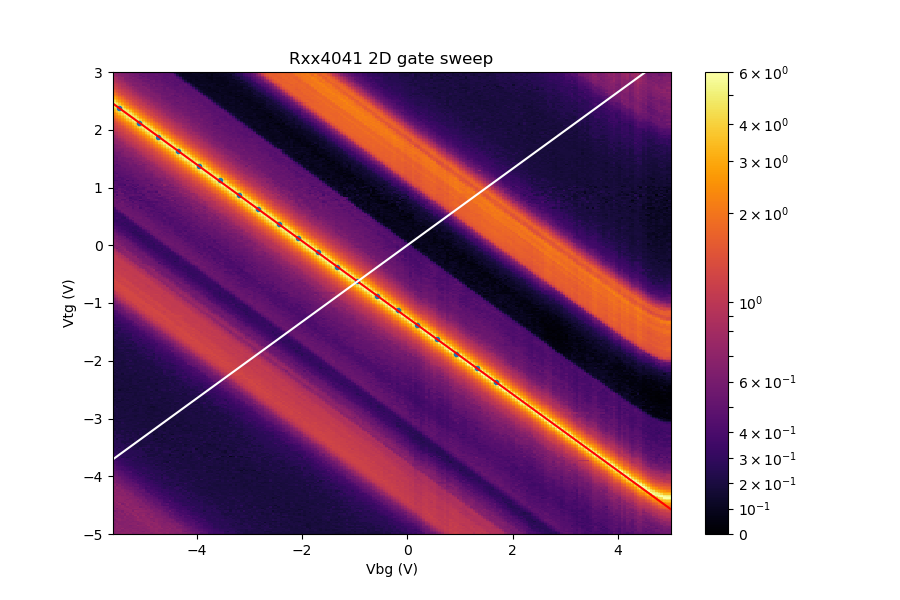

Text(0.5, 1.0, 'Rxx4041 2D gate sweep')

In [19]:
Rxx4041 = npd.Rxxfromdata(d2d, 1e-9, 'lockin830_2')

plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx4041/1000, cmap='inferno', norm=SymLogNorm(0.8, vmin=0, vmax=6))

plt.plot(vbgvals, vtgvals, '.')
x1 = np.array([-5.6, 5])
plt.plot(x1, x1*zdens[0] + zdens[1], 'r')
lim = plt.axis()
plt.plot(x1, x1*zfieldslope, 'w')

plt.xlabel('Vbg (V)')
plt.ylabel('Vtg (V)')
plt.colorbar()
plt.axis(lim)
plt.title('Rxx4041 2D gate sweep')

# 2D gate sweep at 1.5T

In [20]:
d2d_1p5T = qc.load_data('data/2020-09-05/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_1p5T_09-04-21')
vbg = d2d_1p5T.srframe_volt_p1_set[0, :]
vtg = d2d_1p5T.srframe_volt_p5_set[:]
Rxx3534 = npd.Rxxfromdata(d2d_1p5T, 1e-9, 'lockin865')
Rxx3433 = npd.Rxxfromdata(d2d_1p5T, 1e-9, 'lockin830')
Rxx4041 = npd.Rxxfromdata(d2d_1p5T, 1e-9, 'lockin830_2')

<IPython.core.display.Javascript object>


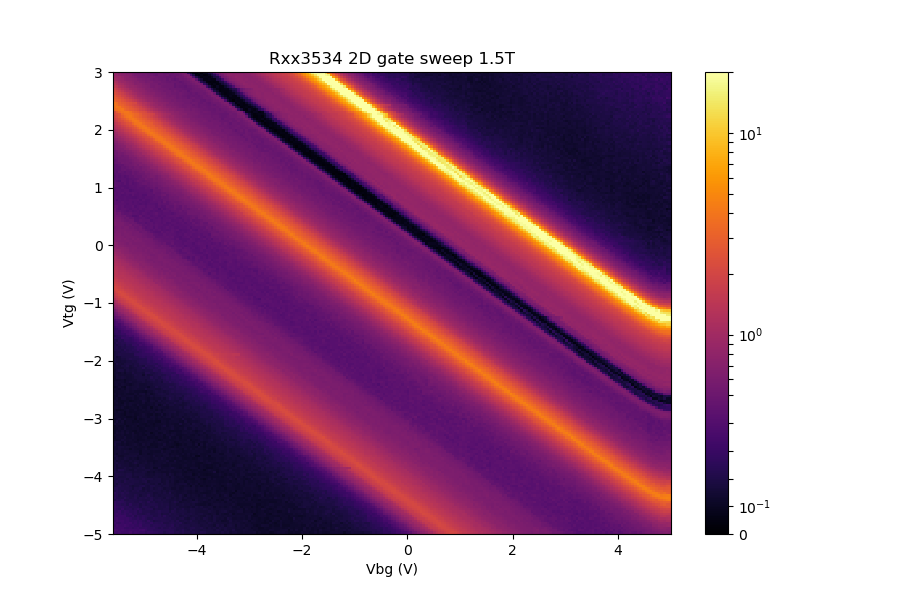

Text(0.5, 1.0, 'Rxx3534 2D gate sweep 1.5T')

In [21]:
plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx3534/1000, cmap='inferno', norm=SymLogNorm(0.5, vmin=0, vmax=20))

plt.xlabel('Vbg (V)')
plt.ylabel('Vtg (V)')
plt.colorbar()
plt.axis(lim)
plt.title('Rxx3534 2D gate sweep 1.5T')

<IPython.core.display.Javascript object>


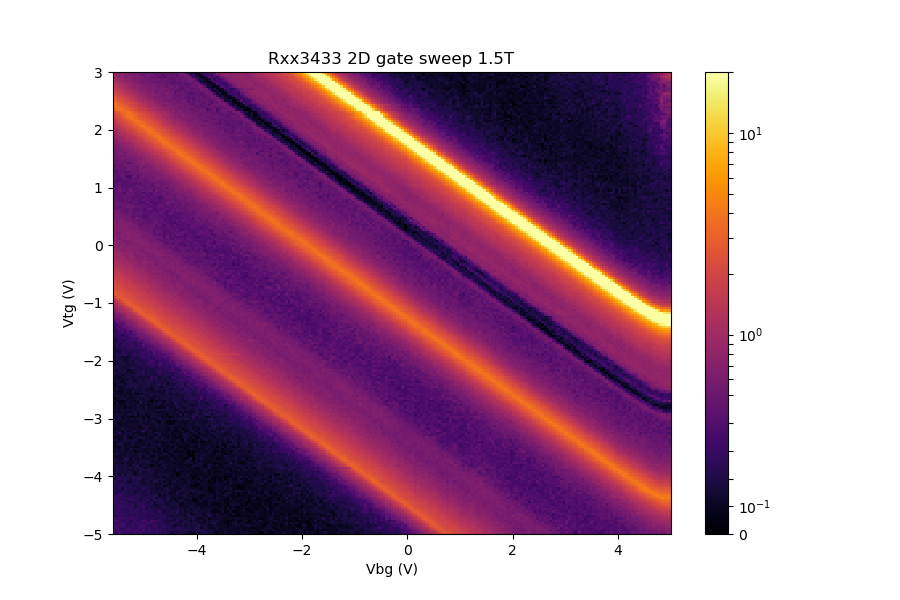

Text(0.5, 1.0, 'Rxx3433 2D gate sweep 1.5T')

In [22]:
plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx3433/1000, cmap='inferno', norm=SymLogNorm(0.5, vmin=0, vmax=20))

plt.xlabel('Vbg (V)')
plt.ylabel('Vtg (V)')
plt.colorbar()
plt.axis(lim)
plt.title('Rxx3433 2D gate sweep 1.5T')

<IPython.core.display.Javascript object>


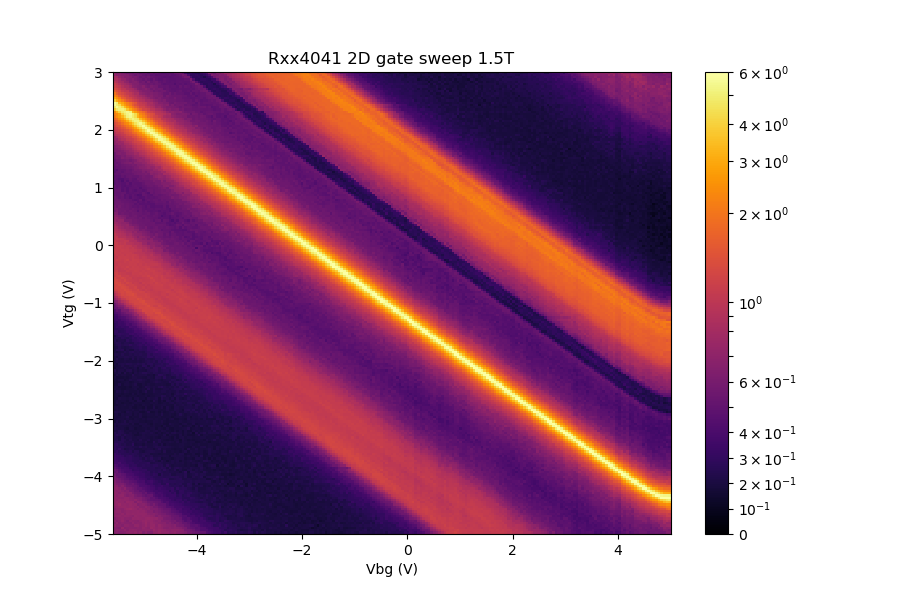

Text(0.5, 1.0, 'Rxx4041 2D gate sweep 1.5T')

In [23]:
plt.figure(figsize=(9, 6))
plt.pcolormesh(vbg, vtg, Rxx4041/1000, cmap='inferno', norm=SymLogNorm(0.8, vmin=0, vmax=6))

plt.xlabel('Vbg (V)')
plt.ylabel('Vtg (V)')
plt.colorbar()
plt.axis(lim)
plt.title('Rxx4041 2D gate sweep 1.5T')

# D0 in plane field dependence

In [237]:
data_D0_B = qc.load_data('data/2020-09-03/#005_S3_865_35-34_830_34-33_8302_40-41_1nA_0D_0to5T_fieldgate_19-24-52')
data_D0_B_2 = qc.load_data('data/2020-09-04/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_0D_5to8T_fieldgate_08-22-18')
vg = data_D0_B.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B.triton_field_set_stable_set[:],data_D0_B_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_2, 1e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_2, 1e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_2, 1e-9, 'lockin830_2')))

Text(0.5, 1.0, 'Rxx3534 2D D0-B sweep')

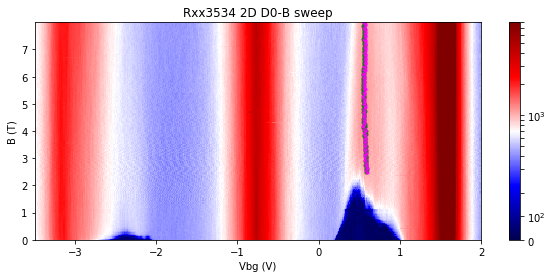

In [238]:
quadpad = 5
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=0, vmax=8e3))
pks = []
pks2 = []
for i in range(50,len(B)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 300:390], 2), prominence=0.8, width=10)
    pind = 300 + peaks[0]
    p = vg[pind]
    pks.append(p)
    plt.plot(p, B[i], ".", color = 'green')
    
    #also fit a quadratic polynomial and plot the peak of that
    theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
    v0 = -theta[1]/(2*theta[0])
    pks2.append(v0)
    plt.plot(v0, B[i], '.', color='magenta')
    
plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('Rxx3534 2D D0-B sweep')

In [239]:
peakvbglowtemp[-1]

0.5625

In [240]:
peakB_half_25mk = B[50:len(B)]
peakvbg_half_25mk = np.array(pks)
peaknu_half_25mk = (peakvbg_half_25mk+0.79)/(0.805+1.6)*4
peakvbg_half_25mk_2 = np.array(pks2)
peaknu_half_25mk_2 = (peakvbg_half_25mk_2+0.79)/(0.805+1.6)*4

# np.savetxt('./data/S3_Peak_data/R3534_half_BvsVbgNu_25mK.txt', np.vstack((peakB_half_25mk, peakvbg_half_25mk_2, peaknu_half_25mk_2)).T, fmt='%.8e')

(2, 2.4)

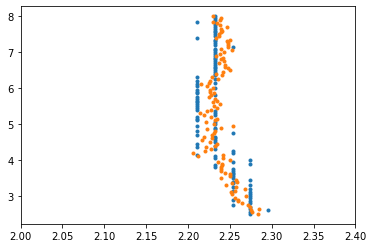

In [215]:
plt.figure()
plt.plot(peaknulowtemp, peakBlowtemp, '.')
plt.plot(peak2nulowtemp, peakBlowtemp, '.')
plt.xlim(2, 2.4)

In [216]:
vg[[320, 325, 330]]

array([0.5   , 0.5625, 0.625 ])

In [174]:
9*16

144

(0, 1.3, 0, 6)

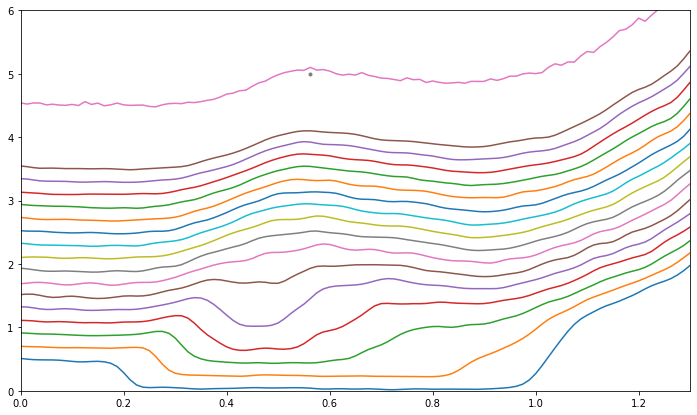

In [175]:
plt.figure(figsize=(12, 7))
for i in range(16):
    plt.plot(vg, gaussian_filter(Rxx3534[i*9, :], 1.2)/1000 + 0.2*i)

plt.plot(vg, Rxx3534[-1, :]/1000 + 4)
plt.plot(peak2vbglowtemp[-1], 5, '.')
plt.axis((0, 1.3, 0, 6))

Text(0.5, 1.0, '25mK filling-in plane field sweep')

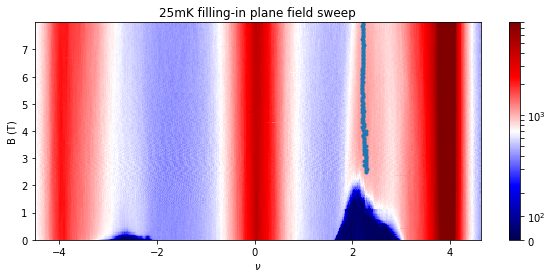

In [222]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg[:]+0.79)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=0, vmax=8e3))

plt.plot(peaknulowtemp, peakBlowtemp, '.')
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('25mK filling-in plane field sweep')

Text(0.5, 1.0, 'Rxx3433 2D D0-B sweep')

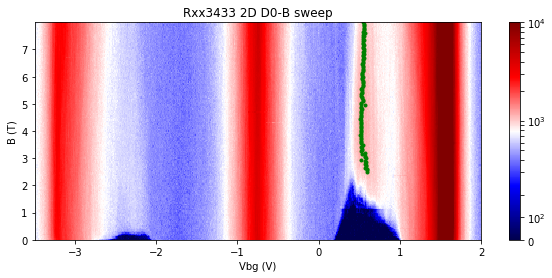

In [13]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, B, Rxx3433, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=0, vmax=10e3))
for i in range(50,len(B)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3433[i, 300:390], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[300+peaks[f]], B[i], ".", color = 'green')
plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('Rxx3433 2D D0-B sweep')

Text(0.5, 1.0, 'Rxx4041 2D D0-B sweep')

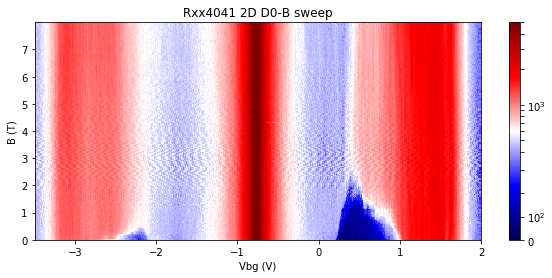

In [14]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, B, Rxx4041, cmap='seismic', norm=colors.SymLogNorm(350,  vmin=0, vmax=5e3))

plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('Rxx4041 2D D0-B sweep')

# 35-34 D0 T dependence

In [455]:
data_D0_T_base = qc.load_data('data/2020-09-05/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_baseT_21-39-49')
data_D0_T_1 = qc.load_data('data/2020-09-05/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweepto1K_21-59-28')
data_D0_T_2 = qc.load_data('data/2020-09-06/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p05to1p4K_08-51-18')
data_D0_T_3 = qc.load_data('data/2020-09-06/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p45to2K_10-53-21')
data_D0_T_4 = qc.load_data('data/2020-09-06/#004_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_2p1to10K_14-00-29')
data_D0_T_5 = qc.load_data('data/2020-09-07/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_10p5to30K_10-15-14')
data_D0_T_6 = qc.load_data('data/2020-09-07/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_30p5to40K_21-03-39')
vg = data_D0_T_base.zeroDparam_set[:]
T = np.concatenate(([0.025], data_D0_T_1.triton_pid_setpoint_set[:],data_D0_T_2.triton_pid_setpoint_set[:], data_D0_T_3.triton_pid_setpoint_set[:], data_D0_T_4.triton_pid_setpoint_set[:], data_D0_T_5.triton_pid_setpoint_set[:], data_D0_T_6.triton_pid_setpoint_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin830_2')))

Text(0.5, 1.0, 'Rxx3534 2D D0-T sweep')

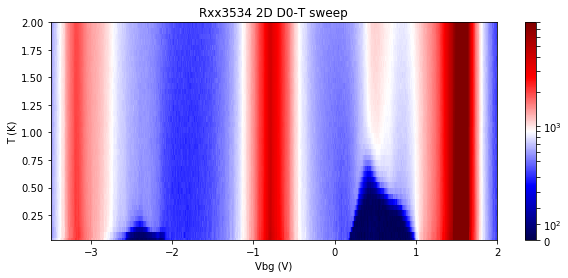

In [456]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.ylim(0.025,2)
plt.title('Rxx3534 2D D0-T sweep')

Text(0.5, 1.0, '0 field filling-T dependence 0.025-2K')

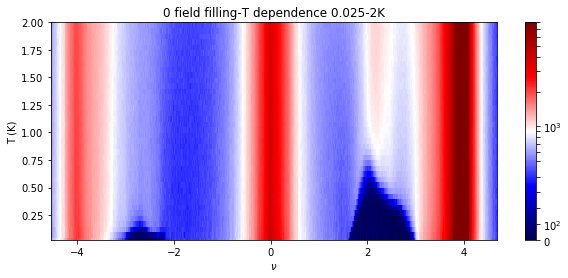

In [457]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg+0.79)/(0.79+1.59)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.ylim(0.025,2)
plt.title('0 field filling-T dependence 0.025-2K')

Text(0.5, 1.0, '0 field filling-T dependence base-10K')

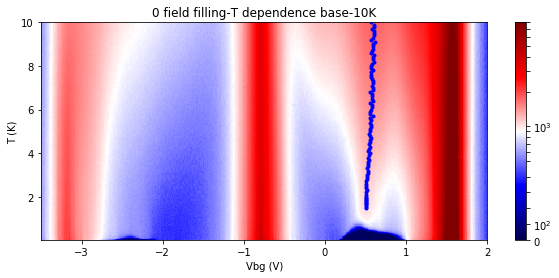

In [458]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))
for i in range(30,len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 390:450], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[390+peaks[f]], T[i], ".", color = 'blue')
plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.ylim(0.025,10)
plt.title('0 field filling-T dependence base-10K')

Text(0.5, 1.0, '0 field filling-T dependence base-10K')

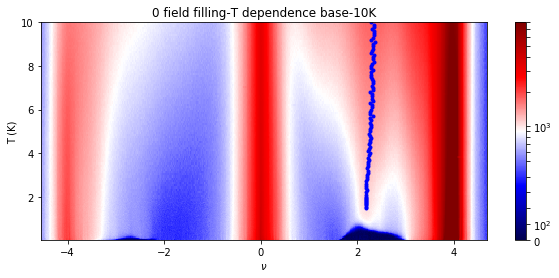

In [19]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg+0.79)/(0.79+1.59)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))
for i in range(30,len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 390:450], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        plt.plot((vg[390+peaks[f]]+0.79)/(0.79+1.59)*4, T[i], ".", color = 'blue')
plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.ylim(0.025,10)
plt.title('0 field filling-T dependence base-10K')

Text(0.5, 1.0, 'Rxx3534 2D D0-T sweep')

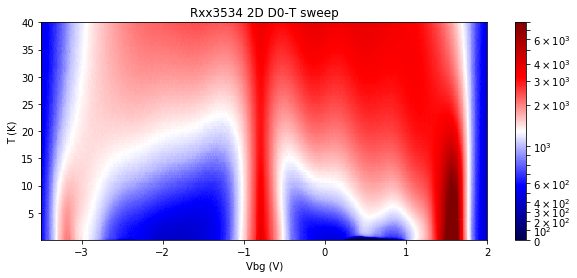

In [459]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx3534 2D D0-T sweep')

In [500]:
(vg[280]+0.79)/(0.805+1.6)*4

0.1496881496881498

Text(0.5, 1.0, '0 field filling-T dependence base-40K')

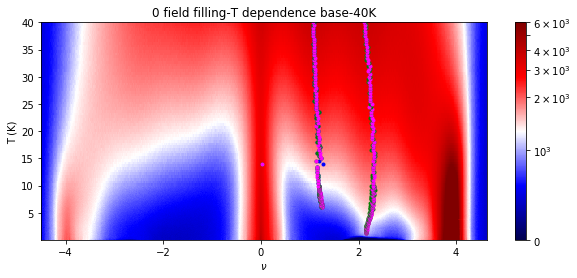

In [549]:
quadpad = 7
quadpadq = 6

plt.figure(figsize=(10, 4))
plt.pcolormesh((vg+0.79)/(0.805+1.6)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(1200,  vmin=0, vmax=6e3))

for i in range(128,len(T)):#1/4 high T
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 300:380], 2), prominence=0.1, width=3)
    for f in range(len(peaks)):
        plt.plot((vg[300+peaks[f]]+0.79)/(0.805+1.6)*4, T[i], ".", color = 'blue')

for i in range(80,128):#1/4 low T
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 3), n=2), 10)
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(3,4):
        plt.plot((vg[peaks[f]+2]+0.79)/(0.805+1.6)*4, T[i], ".", color = 'blue')
        
st = 80
peakvbg_quart_0T = np.zeros(len(T) - st)
peaknu_quart_0T = np.zeros(len(T) - st)
peakT_quart_0T = np.zeros(len(T) - st)
for i in range(st,len(T)):#1/2
    if i < 130:
        snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[i, :], 3), n=2), 10)
        peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
        peaks = [peaks[3]-300+2]
    else:
        peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 300:380], 2), prominence=0.1, width=3)
    if len(peaks) == 0:
        peakvbg_quart_0T = np.nan
        peaknu_quart_0T = np.nan
        peakT_quart_0T = np.nan
    else:
        pind = 300 + peaks[0]
        peakT_quart_0T[i-st] = T[i]
        vg0 = vg[pind]
        nu0 = (vg[pind]+0.79)/(0.805+1.6)*4
        plt.plot(nu0, T[i], ".", color = 'green')
        if i < 130:
            theta = np.polyfit(vg[pind-quadpadq:pind+quadpadq+1], snd_diff[pind-quadpadq-2:pind+quadpadq+1-2], 2)
        else:
            theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_quart_0T[i-st] = v0
        peaknu_quart_0T[i-st] = (v0+0.79)/(0.805+1.6)*4
        plt.plot(peaknu_quart_0T[i-st], T[i], '.', color='magenta')
    
st = 26
peakvbg_half_0T = np.zeros(len(T) - st)
peaknu_half_0T = np.zeros(len(T) - st)
peakT_half_0T = np.zeros(len(T) - st)
for i in range(st,len(T)):#1/2
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 380:450], 2), prominence=0.1, width=3)
    if len(peaks) == 0:
        peakvbg_half_0T = np.nan
        peaknu_half_0T = np.nan
        peakT_half_0T = np.nan
    else:
        pind = 380 + peaks[0]
        peakT_half_0T[i-st] = T[i]
        vg0 = vg[pind]
        nu0 = (vg[pind]+0.79)/(0.805+1.6)*4
        plt.plot(nu0, T[i], ".", color = 'green')
        theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_half_0T[i-st] = v0
        peaknu_half_0T[i-st] = (v0+0.79)/(0.805+1.6)*4
        plt.plot(peaknu_half_0T[i-st], T[i], '.', color='magenta')

plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
# plt.xlim(-0.1, 1.8)
# plt.ylim(5, 18)
plt.title('0 field filling-T dependence base-40K')

In [550]:
npd.val_to_index([0], peaknu_quart_0T)  # get rid of the outlier

0.00 is not a value in the array
Plotted 0.02 instead


[48]

In [551]:
peaknu_quart_0T[48] = np.nan
peakvbg_quart_0T[48] = np.nan
peakT_quart_0T[48] = np.nan

In [553]:
np.savetxt('./data/S3_Peak_data/R3534_half_TvsVbgNu_0T.txt', np.vstack((peakT_half_0T, peakvbg_half_0T, peaknu_half_0T)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/R3534_quarter_TvsVbgNu_0T.txt', np.vstack((peakT_quart_0T, peakvbg_quart_0T, peaknu_quart_0T)).T, fmt='%.8e')

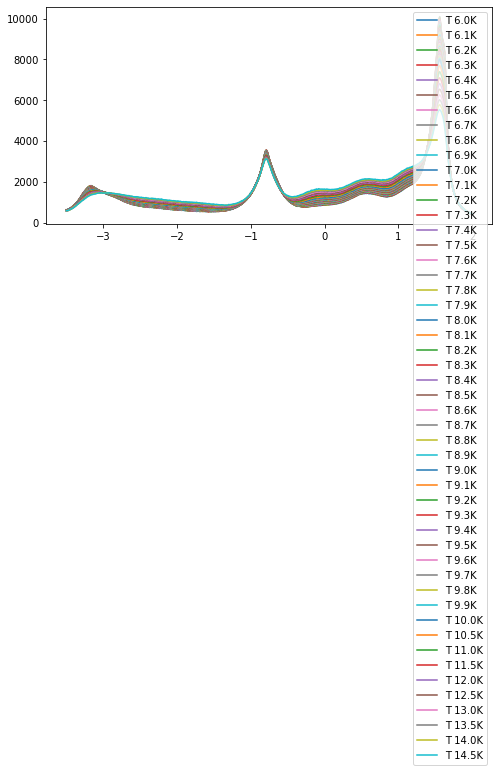

In [23]:
plt.figure(figsize=(8, 4))
for i in range(80, 130):
    indx=1*i 
    plt.plot(vg, Rxx3534[indx, :], label='T {}K'.format(T[indx]))
    
plt.legend()

Text(0.5, 0, '$\\nu$')

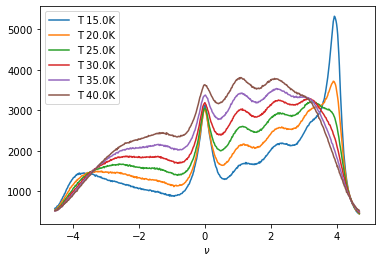

In [24]:
plt.figure(figsize=(6, 4))
for i in range(13, 19):
    indx=10*i 
    plt.plot((vg+0.79)/(0.79+1.59)*4, Rxx3534[indx, :], label='T {}K'.format(T[indx]))
    
plt.legend()
plt.xlabel(r'$\nu$')

Text(0.5, 1.0, 'Rxx3534 2D D0-T sweep')

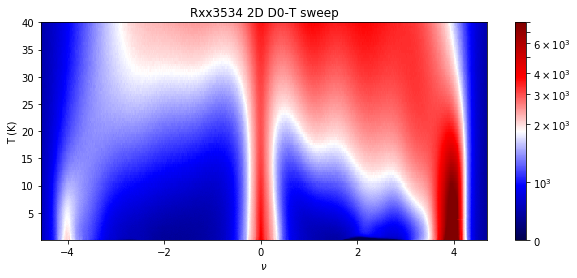

In [25]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg+0.79)/(0.79+1.59)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(2000,  vmin=0, vmax=8e3))

plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx3534 2D D0-T sweep')

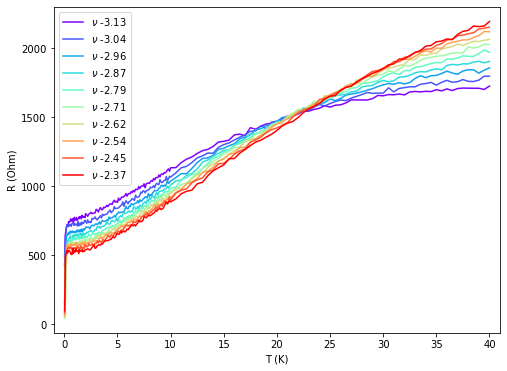

In [26]:
N = 10
cs = plt.get_cmap('rainbow')(np.linspace(0,1,N))


plt.figure(figsize=(8, 6))
for i in range(10):
    indx=5*(17+i) 
    plt.plot(T, Rxx3534[:, indx], color = cs[i], label=r'$\nu$ {:.2f}'.format((vg[indx]+0.79)/(0.79+1.59)*4))
    
plt.xlim(-1,41)
plt.xlabel('T (K)')
plt.ylabel('R (Ohm)')
plt.legend()

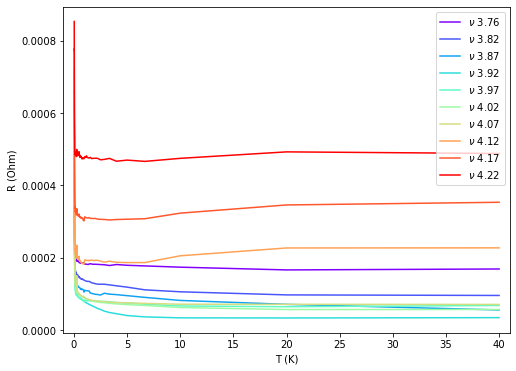

In [27]:
N = 10
cs = plt.get_cmap('rainbow')(np.linspace(0,1,N))


plt.figure(figsize=(8, 6))
for i in range(10):
    indx=3*(165+i) 
    plt.plot(1/T, 1/Rxx3534[:, indx], color = cs[i], label=r'$\nu$ {:.2f}'.format((vg[indx]+0.79)/(0.79+1.59)*4))
    
plt.xlim(-1,41)
plt.xlabel('T (K)')
plt.ylabel('R (Ohm)')
plt.legend()

In [28]:
len(T)

181

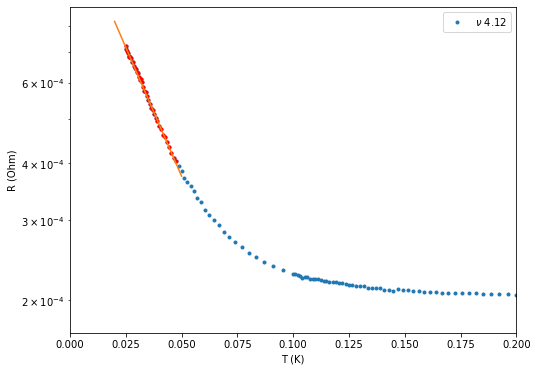

In [29]:
n1=142
n2 = 181
plt.figure(figsize=(8, 6))
indx = 3*(165+7)
plt.semilogy(1/T, 1/Rxx3534[:,indx], '.', label=r'$\nu$ {:.2f}'.format((vg[indx]+0.79)/(0.79+1.59)*4))
m, b = np.polyfit(1/T[n1:n2], np.log(1/Rxx3534[n1:n2,indx]), 1) 
plt.semilogy(1/T[n1:n2], 1/Rxx3534[n1:n2,indx], '.r')
x = np.linspace(0.02, 0.05, 100)
plt.semilogy(x, np.exp(m*x + b))


plt.xlim(0,0.2)
plt.xlabel('T (K)')
plt.ylabel('R (Ohm)')
plt.legend()

In [30]:
m

-26.033101756352462

In [31]:
m*-1.381e-23/1.602e-19*2*1000

4.4883537485047125

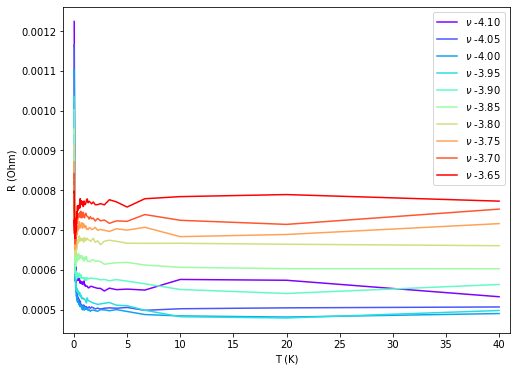

In [32]:
N = 10
cs = plt.get_cmap('rainbow')(np.linspace(0,1,N))


plt.figure(figsize=(8, 6))
for i in range(10):
    indx=3*(9+i) 
    plt.plot(1/T, 1/Rxx3534[:, indx], color = cs[i], label=r'$\nu$ {:.2f}'.format((vg[indx]+0.79)/(0.79+1.59)*4))
    
plt.xlim(-1,41)
plt.xlabel('T (K)')
plt.ylabel('R (Ohm)')
plt.legend()

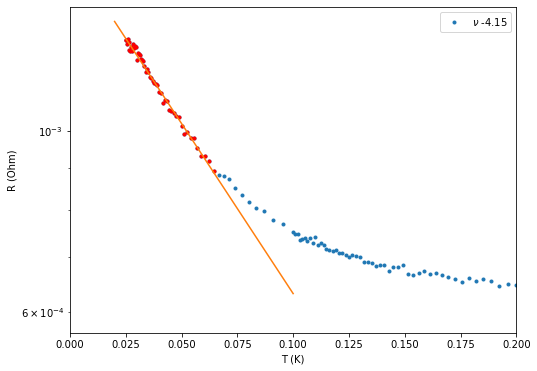

In [33]:
n1=131
n2 = 181
plt.figure(figsize=(8, 6))
indx = 3*(8)
plt.semilogy(1/T, 1/Rxx3534[:,indx], '.', label=r'$\nu$ {:.2f}'.format((vg[indx]+0.79)/(0.79+1.59)*4))
m, b = np.polyfit(1/T[n1:n2], np.log(1/Rxx3534[n1:n2,indx]), 1) 
plt.semilogy(1/T[n1:n2], 1/Rxx3534[n1:n2,indx], '.r')
x = np.linspace(0.02, 0.1, 100)
plt.semilogy(x, np.exp(m*x + b))


plt.xlim(0,0.2)
plt.xlabel('T (K)')
plt.ylabel('R (Ohm)')
plt.legend()

In [34]:
m

-9.607062586215667

In [35]:
m*-1.381e-23/1.602e-19*2*1000

1.6563487430167085

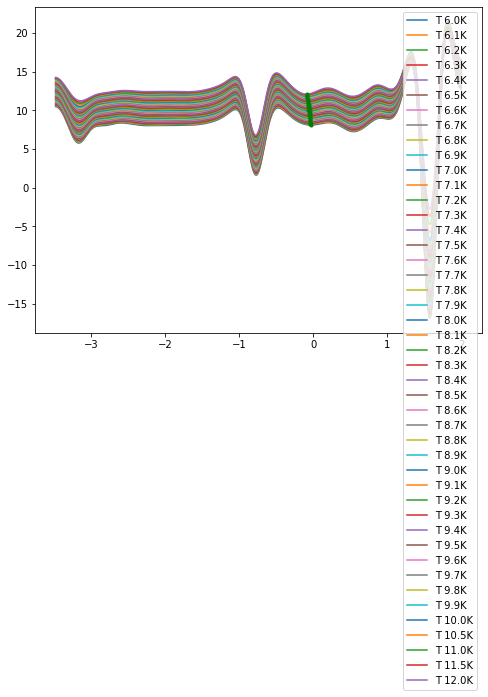

In [36]:
#
plt.figure(figsize=(8, 6))
for i in range(80,125):
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
    plt.plot(vg[2:], snd_diff+i*0.1, label='T {}K'.format(T[indx]))
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(3,4):
        plt.plot(vg[peaks[f]+2], snd_diff[peaks[f]]+i*0.1, ".", color = 'green')
plt.legend()

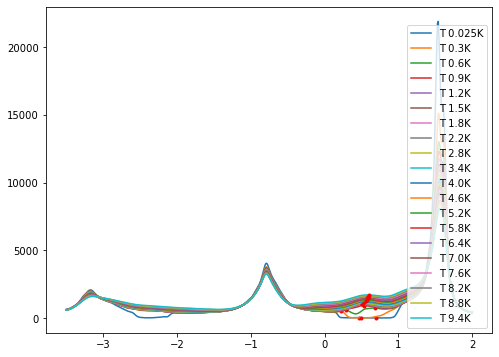

In [37]:
plt.figure(figsize=(8, 6))
for i in range(0, 20):
    indx=6*i 
    plt.plot(vg, gaussian_filter(Rxx3534[indx, :], 2), label='T {}K'.format(T[indx]))
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[indx, 300:450], 2), prominence=0.1, width=3)
    plt.plot(vg[300+peaks], Rxx3534[indx, 300+peaks], ".", color = 'r')
plt.legend()

In [38]:
from numpy import diff

Text(0.5, 1.0, 'line cuts')

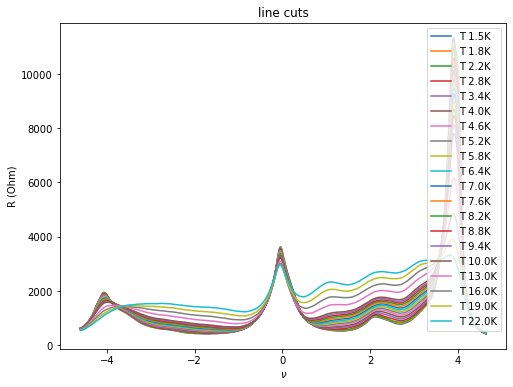

In [39]:
plt.figure(figsize=(8, 6))
for i in range(5, 25):
    indx=6*i 
    plt.plot((vg[:]+0.7625)/(0.7625+1.6117)*4, gaussian_filter(Rxx3534[indx, :], 2), label='T {}K'.format(T[indx]))

plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

# 34-35 2.3K in plane field

In [255]:
data_D0_B_2p3K = qc.load_data('data/2020-09-12/#003_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_0to6T_fieldgate_2p3K_18-24-48')
data_D0_B_2p3K_2 = qc.load_data('data/2020-09-13/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6p1to8T_fieldgate_2p3K_08-22-27')
vg = data_D0_B_2p3K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_2p3K.triton_field_set_stable_set[:],data_D0_B_2p3K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_2p3K, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_2p3K_2, 3e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_2p3K, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_2p3K_2, 3e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_2p3K, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_2p3K_2, 3e-9, 'lockin830_2')))

In [260]:
(vg[305]+0.805)/(0.805+1.6)*4

2.2120582120582117

Text(0.5, 1.0, '2.3K filling-in plane field sweep')

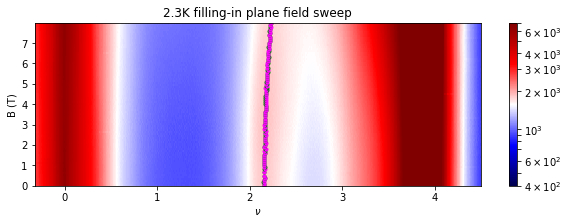

In [261]:
quadpad = 5
plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(700,  vmin=400, vmax=7e3))

# for i in range(len(B)):#1/4
#     peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
#     for f in range(len(peaks)):
#         plt.plot((vg[100+peaks[f]]+0.805)/(0.805+1.6)*4, B[i], ".", color = 'green')
        
peakvbg_half_2p3K = np.zeros(len(B))
peaknu_half_2p3K = np.zeros(len(B))
peakvbg_half_2p3K_2 = np.zeros(len(B))
peaknu_half_2p3K_2 = np.zeros(len(B))
peakB_half_2p3K = np.zeros(len(B))
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
    if len(peaks) == 0:
        peakvbg_half_2p3K[i] = np.nan
        peaknu_half_2p3K[i] = np.nan
        peakvbg_half_2p3K_2[i] = np.nan
        peaknu_half_2p3K_2[i] = np.nan
        peakB_half_2p3K[i] = np.nan
    else:
        pind = 290 + peaks[0]
        peakB_half_2p3K[i] = B[i]
        peakvbg_half_2p3K[i] = vg[pind]
        peaknu_half_2p3K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_2p3K[i], B[i], ".", color = 'green')
        
        theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_half_2p3K_2[i] = v0
        peaknu_half_2p3K_2[i] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_2p3K_2[i], B[i], '.', color='magenta')
        
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
# plt.xlim(1.9, 2.5)
plt.title('2.3K filling-in plane field sweep')

In [243]:
# np.savetxt('./data/S3_Peak_data/R3534_half_BvsVbgNu_2p3K.txt', np.vstack((peakB_half_2p3K, peakvbg_half_2p3K_2, peaknu_half_2p3K_2)).T, fmt='%.8e')

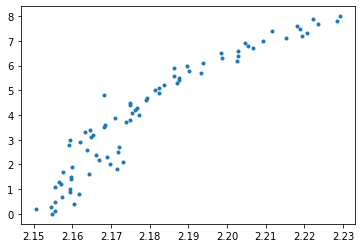

In [244]:
plt.figure()
plt.plot(peaknu_half_2p3K_2, peakB_half_2p3K, '.')

(2.5, 3.5, 0, 4000)

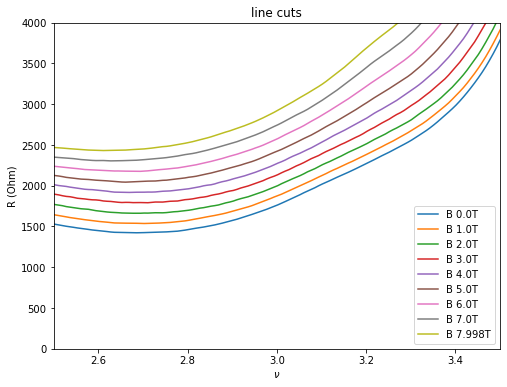

In [202]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 1) + 100*i, label='B {}T'.format(B[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

plt.axis((2.5, 3.5, 0, 4000))

# 34-35 5K in plane field

In [376]:
data_D0_B_5K = qc.load_data('data/2020-09-08/#002_S3_865_35-34_830_34-33_8302_40-41_3nA_0D_0to5T_fieldgate_5K_10-37-35')
data_D0_B_5K_2 = qc.load_data('data/2020-09-08/#003_S3_865_35-34_830_34-33_8302_40-41_3nA_0D_5p1to8T_fieldgate_5K_22-39-14')
vg = data_D0_B_5K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_5K.triton_field_set_stable_set[:],data_D0_B_5K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_5K, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_5K_2, 3e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_5K, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_5K_2, 3e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_5K, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_5K_2, 3e-9, 'lockin830_2')))

In [377]:
vg[250]

0.25

Text(0.5, 1.0, 'Rxx3534 2D D0-B sweep 5K')

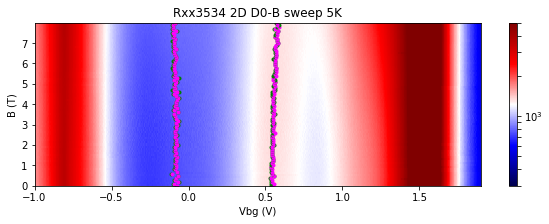

In [378]:
quadpad = 7
quadpadq = 12
plt.figure(figsize=(10, 3))
plt.pcolormesh(vg, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=300, vmax=5e3)) #norm=colors.SymLogNorm(300,  vmin=300, vmax=5e3)

peakvbg_quarter_5K = np.zeros(len(B))
peaknu_quarter_5K = np.zeros(len(B))
peakvbg_quarter_5K_2 = np.zeros(len(B))
peaknu_quarter_5K_2 = np.zeros(len(B))
peakB_quarter_5K = np.zeros(len(B))
for i in range(len(B)):#1 quarter
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[i, 100:270], 4), n=2), 10)
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    if len(peaks) == 0:
        peakvbg_quarter_5K[i] = np.nan
        peaknu_quarter_5K[i] = np.nan
        peakvbg_quarter_5K_2[i] = np.nan
        peaknu_quarter_5K_2[i] = np.nan
        peakB_quarter_5K[i] = np.nan
    else:
        pind = peaks[0] + 100
        peakvbg_quarter_5K[i] = vg[pind]
        peakB_quarter_5K[i] = B[i]
        peaknu_quarter_5K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peakvbg_quarter_5K[i], B[i], ".", color = 'green')
        theta = np.polyfit(vg[pind-quadpadq:pind+quadpadq+1], snd_diff[peaks[0]-quadpadq:peaks[0]+quadpadq+1], 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_quarter_5K_2[i] = v0
        peaknu_quarter_5K_2[i] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peakvbg_quarter_5K_2[i], B[i], '.', color='magenta')
        

peakvbg_half_5K = np.zeros(len(B))
peaknu_half_5K = np.zeros(len(B))
peakvbg_half_5K_2 = np.zeros(len(B))
peaknu_half_5K_2 = np.zeros(len(B))
peakB_half_5K = np.zeros(len(B))
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:400], 2), prominence=0.5, width=10)
    if len(peaks) == 0:
        peakvbg_half_5K[i] = np.nan
        peaknu_half_5K[i] = np.nan
        peakvbg_half_5K_2[i] = np.nan
        peaknu_half_5K_2[i] = np.nan
        peakB_half_5K_2[i] = np.nan
    else:
        pind = 290 + peaks[0]
        peakB_half_5K[i] = B[i]
        peakvbg_half_5K[i] = vg[pind]
        peaknu_half_5K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peakvbg_half_5K[i], B[i], ".", color = 'green')
        theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_half_5K_2[i] = v0
        peaknu_half_5K_2[i] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peakvbg_half_5K_2[i], B[i], '.', color='magenta')
        
plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
# plt.xlim(-0.2, 0.1)
plt.title('Rxx3534 2D D0-B sweep 5K')

In [379]:
np.savetxt('./data/S3_Peak_data/R3534_half_BvsVbgNu_5K.txt', np.vstack((peakB_half_5K, peakvbg_half_5K_2, peaknu_half_5K_2)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/R3534_quarter_BvsVbgNu_5K.txt', np.vstack((peakB_quarter_5K, peakvbg_quarter_5K_2, peaknu_quarter_5K_2)).T, fmt='%.8e')

Text(0.5, 1.0, '5K filling-in plane field sweep')

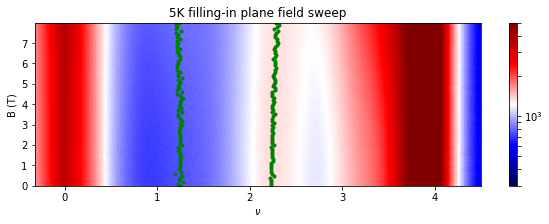

In [45]:
plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(300,  vmin=300, vmax=5e3))

for i in range(len(B)):#1 quarter
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(1,2):
        plt.plot((vg[peaks[f]+2]+0.805)/(0.805+1.546)*4, B[i], ".", color = 'green')
        
peak_half_5K = np.zeros(len(B))        
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:400], 2), prominence=0.5, width=10)
    for f in range(len(peaks)):
        peak_half_5K[i] = (vg[290+peaks[f]]+0.805)/(0.805+1.6)*4
        plt.plot(peak_half_5K[i], B[i], ".", color = 'green')
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('5K filling-in plane field sweep')

In [336]:
peakB_quarter_5K

array([0.   , 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  , 0.8  ,
       0.9  , 1.   , 1.1  , 1.2  , 1.3  , 1.4  , 1.5  , 1.6  , 1.7  ,
       1.8  , 1.9  , 2.   , 2.1  , 2.2  , 2.3  , 2.4  , 2.5  , 2.6  ,
       2.7  , 2.8  , 2.9  , 3.   , 3.1  , 3.2  , 3.3  , 3.4  , 3.5  ,
       3.6  , 3.7  , 3.8  , 3.9  , 4.   , 4.1  , 4.2  , 4.3  , 4.4  ,
       4.5  , 4.6  , 4.7  , 4.8  , 4.9  , 5.   , 5.1  , 5.2  , 5.3  ,
       5.4  , 5.5  , 5.6  , 5.7  , 5.8  , 5.9  , 6.   , 6.1  , 6.2  ,
       6.3  , 6.4  , 6.5  , 6.6  , 6.7  , 6.8  , 6.9  , 7.   , 7.1  ,
       7.2  , 7.3  , 7.4  , 7.5  , 7.6  , 7.7  , 7.8  , 7.9  , 7.998])

(0.5, 2.5, 0, 3000)

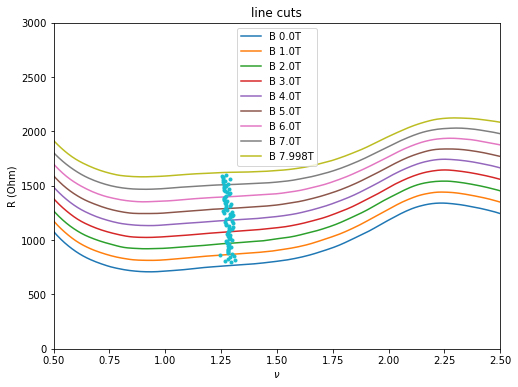

In [339]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 3) + 100*i, label='B {}T'.format(B[indx]))
plt.legend()

plt.plot(peaknu_quarter_5K_2, 800 + peakB_quarter_5K*100, '.')
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')
plt.axis((0.5, 2.5, 0, 3000))

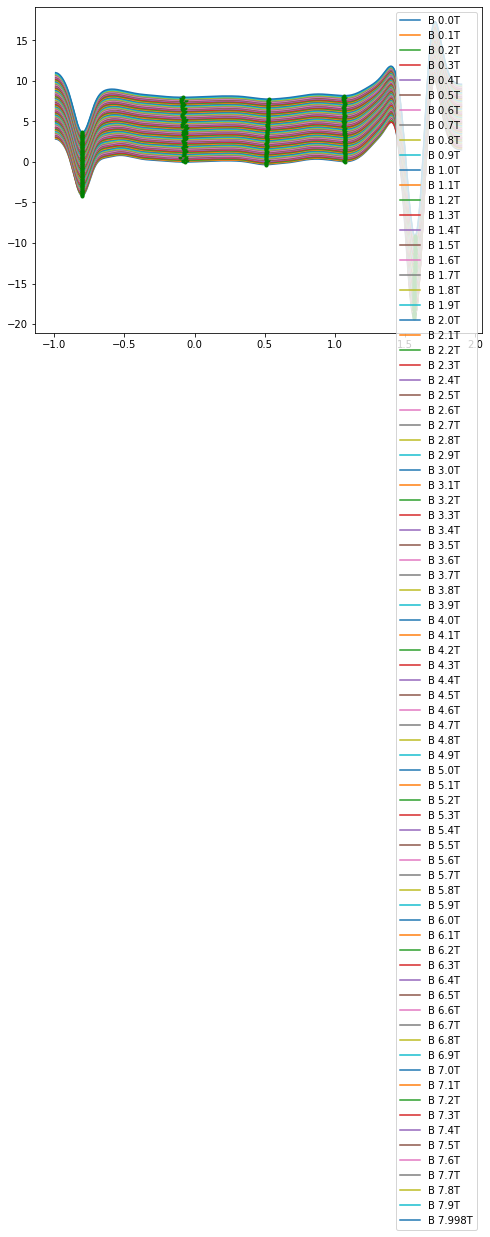

In [47]:
plt.figure(figsize=(8, 6))
for i in range(len(B)):
    indx=1*i 
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
    plt.plot(vg[2:], snd_diff+i*0.1, label='B {}T'.format(B[indx]))
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[peaks[f]+2], snd_diff[peaks[f]]+i*0.1, ".", color = 'green')
plt.legend()

# 34-35 7.5K in plane field

In [388]:
data_D0_B_7p5K = qc.load_data('data/2020-09-13/#002_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_8to6p1T_fieldgate_7p5K_18-11-14')
data_D0_B_7p5K_2 = qc.load_data('data/2020-09-14/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_7p5K_03-42-53')
vg = data_D0_B_7p5K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_7p5K.triton_field_set_stable_set[:],data_D0_B_7p5K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_7p5K, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_7p5K_2, 3e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_7p5K, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_7p5K_2, 3e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_7p5K, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_7p5K_2, 3e-9, 'lockin830_2')))

Text(0.5, 1.0, '7.5K filling-in plane field sweep')

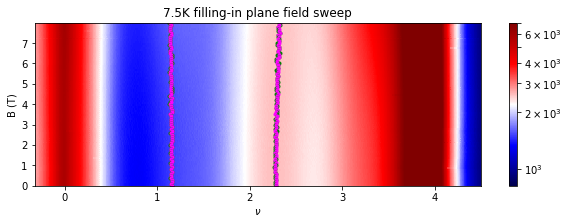

In [389]:
quadpad = 7
quadpadq = 10
plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(2000,  vmin=700, vmax=7e3))

# for i in range(len(B)):#1 quarter
#     indx=1*i 
#     snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[indx, :], 5), n=2), 10)
#     peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
#     for f in range(1,2):
#         plt.plot((vg[peaks[f]+2]+0.805)/(0.805+1.546)*4, B[i], ".", color = 'green')

peakvbg_quarter_7p5K = np.zeros(len(B))
peaknu_quarter_7p5K = np.zeros(len(B))
peakvbg_quarter_7p5K_2 = np.zeros(len(B))
peaknu_quarter_7p5K_2 = np.zeros(len(B))
peakB_quarter_7p5K = np.zeros(len(B))
for i in range(len(B)):#1 quarter
    snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[i, 100:270], 4), n=2), 10)
    peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
    if len(peaks) == 0:
        peakvbg_quarter_7p5K[i] = np.nan
        peaknu_quarter_7p5K[i] = np.nan
        peakvbg_quarter_7p5K_2[i] = np.nan
        peaknu_quarter_7p5K_2[i] = np.nan
        peakB_quarter_7p5K[i] = np.nan
    else:
        pind = peaks[0] + 100 - 1
        peakvbg_quarter_7p5K[i] = vg[pind]
        peakB_quarter_7p5K[i] = B[i]
        peaknu_quarter_7p5K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_quarter_7p5K[i], B[i], ".", color = 'green')
        theta = np.polyfit(vg[pind-quadpadq:pind+quadpadq+1], snd_diff[peaks[0]-quadpadq:peaks[0]+quadpadq+1], 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_quarter_7p5K_2[i] = v0
        peaknu_quarter_7p5K_2[i] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_quarter_7p5K_2[i], B[i], '.', color='magenta')
    
        
peakvbg_half_7p5K = np.zeros(len(B))
peaknu_half_7p5K = np.zeros(len(B))
peakvbg_half_7p5K_2 = np.zeros(len(B))
peaknu_half_7p5K_2 = np.zeros(len(B))
peakB_half_7p5K = np.zeros(len(B))
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:400], 2), prominence=0.5, width=10)
    if len(peaks) == 0:
        peakvbg_half_7p5K[i] = np.nan
        peaknu_half_7p5K[i] = np.nan
        peakvbg_half_7p5K_2[i] = np.nan
        peaknu_half_7p5K_2[i] = np.nan
        peakB_half_7p5K_2[i] = np.nan
    else:
        pind = 290 + peaks[0]
        peakvbg_half_7p5K[i] = vg[pind]
        peaknu_half_7p5K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_7p5K[i], B[i], ".", color = 'green')
        peakB_half_7p5K[i] = B[i]
        theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_half_7p5K_2[i] = v0
        peaknu_half_7p5K_2[i] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_7p5K_2[i], B[i], '.', color='magenta')
        
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
plt.xlim(2, 2.5)
plt.title('7.5K filling-in plane field sweep')

In [390]:
np.savetxt('./data/S3_Peak_data/R3534_half_BvsVbgNu_7p5K.txt', np.vstack((peakB_half_7p5K, peakvbg_half_7p5K_2, peaknu_half_7p5K_2)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/R3534_quarter_BvsVbgNu_7p5K.txt', np.vstack((peakB_quarter_7p5K, peakvbg_quarter_7p5K_2, peaknu_quarter_7p5K_2)).T, fmt='%.8e')

Text(0.5, 1.0, '2.3K filling-in plane field sweep')

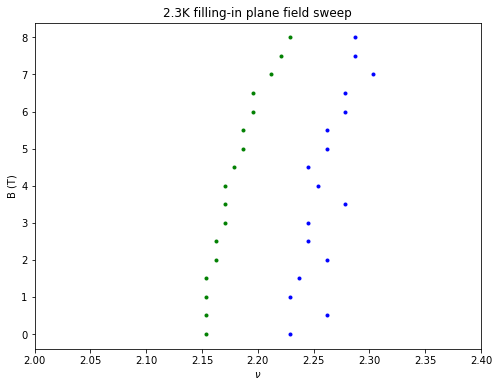

In [50]:
Brev = B[::-1]  
plt.figure(figsize=(8, 6))

peak_half_2p3K_fit = np.zeros(17)
peak_half_5K_fit = np.zeros(17)
for i in range(17):
    plt.plot(peak_half_2p3K[5*i], Brev[5*i], ".", color = 'green') 
    plt.plot(peak_half_5K[5*i], Brev[5*i], ".", color = 'blue')  
    peak_half_2p3K_fit[i] = peak_half_2p3K[5*i]
    peak_half_5K_fit[i] = peak_half_5K[5*i]

    #plt.plot(peak_half_7p5K[5*i], B[5*i], ".", color = 'yellow') 
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.xlim(2, 2.4)
plt.axis()
plt.title('2.3K filling-in plane field sweep')

Text(0.5, 1.0, 'line cuts')

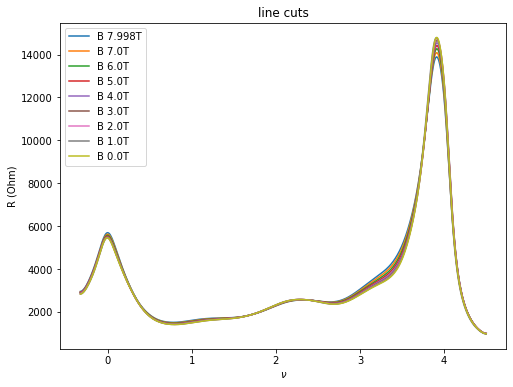

In [51]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='B {}T'.format(B[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

# 12K in plane field data

In [391]:
data_D0_B_12K = qc.load_data('data/2020-09-09/#004_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_5p1to8T_fieldgate_12K_13-37-45')
data_D0_B_12K_2 = qc.load_data('data/2020-09-09/#005_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_12K_23-09-21')
vg = data_D0_B_12K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_12K.triton_field_set_stable_set[:],data_D0_B_12K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_12K, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_12K_2, 3e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_12K, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_12K_2, 3e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_12K, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_12K_2, 3e-9, 'lockin830_2')))

In [392]:
vg[100]

-0.5

Text(0.5, 1.0, 'Rxx3534 2D D0-B sweep 12K')

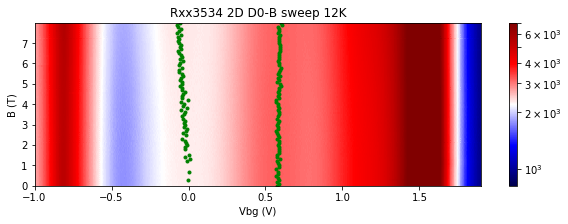

In [393]:
plt.figure(figsize=(10, 3))
plt.pcolormesh(vg, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(2000,  vmin=700, vmax=7e3))

for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
    for f in range(len(peaks)):
        plt.plot(vg[100+peaks[f]], B[i], ".", color = 'green')

for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
    for f in range(len(peaks)):
        plt.plot(vg[290+peaks[f]], B[i], ".", color = 'green')
        
plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.colorbar()
plt.axis()
plt.title('Rxx3534 2D D0-B sweep 12K')

Text(0.5, 1.0, '12K filling-in plane field sweep')

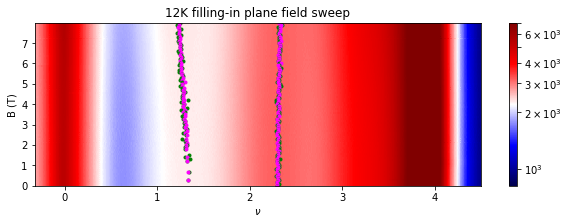

In [431]:
quadpad = 7
quadpadq = 10

plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(2000,  vmin=700, vmax=7e3))

# peak_quarter_12K = np.zeros(len(B)) 
# for i in range(len(B)):#1/4
#     peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
#     for f in range(len(peaks)):
#         peak_quarter_12K[i] = (vg[100+peaks[f]]+0.805)/(0.805+1.6)*4
#         plt.plot(peak_quarter_12K[i], B[i], ".", color = 'green')

peakvbg_quarter_12K = np.zeros(len(B))
peaknu_quarter_12K = np.zeros(len(B))
peakvbg_quarter_12K_2 = np.zeros(len(B))
peaknu_quarter_12K_2 = np.zeros(len(B))
peakB_quarter_12K = np.zeros(len(B))
for i in range(len(B)):#1 quarter
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
    if len(peaks) == 0:
        peakvbg_quarter_12K[i] = np.nan
        peaknu_quarter_12K[i] = np.nan
        peakvbg_quarter_12K_2[i] = np.nan
        peaknu_quarter_12K_2[i] = np.nan
        peakB_quarter_12K[i] = np.nan
    else:
        pind = peaks[0] + 100
        peakvbg_quarter_12K[i] = vg[pind]
        peakB_quarter_12K[i] = B[i]
        peaknu_quarter_12K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_quarter_12K[i], B[i], ".", color = 'green')
        theta = np.polyfit(vg[pind-quadpadq:pind+quadpadq+1], gaussian_filter(Rxx3534[i, pind-quadpadq:pind+quadpadq+1], 1), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_quarter_12K_2[i] = v0
        peaknu_quarter_12K_2[i] = (v0+0.805)/(0.805+1.6)*4
        if peaknu_quarter_12K_2[i] < 1:
            peakvbg_quarter_12K[i] = np.nan
            peaknu_quarter_12K[i] = np.nan
            peakvbg_quarter_12K_2[i] = np.nan
            peaknu_quarter_12K_2[i] = np.nan
            peakB_quarter_12K[i] = np.nan
        else:
            plt.plot(peaknu_quarter_12K_2[i], B[i], '.', color='magenta')

peakvbg_half_12K = np.zeros(len(B))
peaknu_half_12K = np.zeros(len(B))
peakvbg_half_12K_2 = np.zeros(len(B))
peaknu_half_12K_2 = np.zeros(len(B))
peakB_half_12K = np.zeros(len(B))
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
    if len(peaks) == 0:
        peakvbg_half_12K[i] = np.nan
        peaknu_half_12K[i] = np.nan
        peakvbg_half_12K_2[i] = np.nan
        peaknu_half_12K_2[i] = np.nan
        peakB_half_12K_2[i] = np.nan
    else:
        pind = 290 + peaks[0]
        peakvbg_half_12K[i] = vg[pind]
        peaknu_half_12K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_12K[i], B[i], ".", color = 'green')
        peakB_half_12K[i] = B[i]
        theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_half_12K_2[i] = v0
        peaknu_half_12K_2[i] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_12K_2[i], B[i], '.', color='magenta')
        
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
# plt.xlim(1, 1.7)
plt.title('12K filling-in plane field sweep')

In [432]:
np.savetxt('./data/S3_Peak_data/R3534_half_BvsVbgNu_12K.txt', np.vstack((peakB_half_12K, peakvbg_half_12K_2, peaknu_half_12K_2)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/R3534_quarter_BvsVbgNu_12K.txt', np.vstack((peakB_quarter_12K, peakvbg_quarter_12K_2, peaknu_quarter_12K_2)).T, fmt='%.8e')

Text(0.5, 1.0, 'half filling-in plane field T raw data')

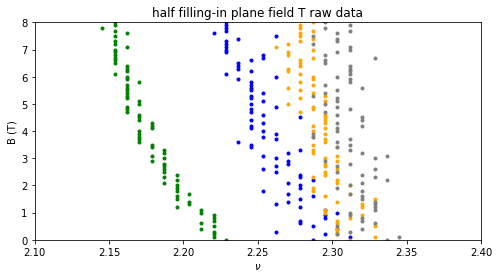

In [56]:
plt.figure(figsize=(8, 4))

plt.plot(peak_half_2p3K[:], B[:], ".", color = 'green') 



plt.plot(peak_half_5K[:], B[:], ".", color = 'blue') 
 

plt.plot(peak_half_7p5K[:], B[::-1], ".", color = 'orange') 


plt.plot(peak_half_12K[:], B[::-1], ".", color = 'grey')


plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.xlim(2.1, 2.4)
plt.ylim(0,8)
plt.axis()
plt.title('half filling-in plane field T raw data')

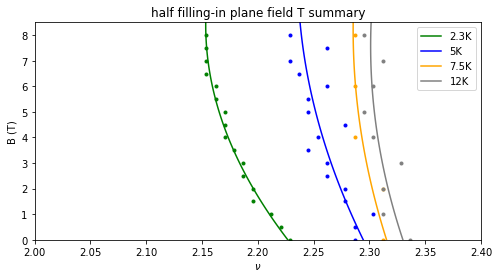

In [82]:
Brev = B[::-1]  

plt.figure(figsize=(8, 4))

peak_half_2p3K_fit = np.zeros(17)
B_fit= np.zeros(17)
for i in range(17):
    plt.plot(peak_half_2p3K[5*i], B[5*i], ".", color = 'green')  
    peak_half_2p3K_fit[i] = peak_half_2p3K[5*i]
    B_fit[i] = B[5*i]
fit = np.polyfit(B_fit[:],peak_half_2p3K_fit[:] ,2)
ffit = np.poly1d(fit)
x = np.linspace(0, 9, 101)
plt.plot(ffit(x), x, color = 'green', label = '2.3K') 


peak_half_5K_fit = np.zeros(17)
B_fit= np.zeros(17)
for i in range(17):
    plt.plot(peak_half_5K[5*i], B[5*i], ".", color = 'blue')  
    peak_half_5K_fit[i] = peak_half_5K[5*i]
    B_fit[i] = B[5*i]
fit = np.polyfit(B_fit[:],peak_half_5K_fit[:] ,2)
ffit = np.poly1d(fit)
x = np.linspace(0, 9, 101)
plt.plot(ffit(x), x, color = 'blue', label = '5K') 


peak_half_7p5K_fit = np.zeros(5)
Brev_fit= np.zeros(5)
for i in range(5):
    plt.plot(peak_half_7p5K[20*i], Brev[20*i], ".", color = 'orange')  
    peak_half_7p5K_fit[i] = peak_half_7p5K[20*i]
    Brev_fit[i] = Brev[20*i]
fit = np.polyfit(Brev_fit[:],peak_half_7p5K_fit[:] ,2)
ffit = np.poly1d(fit)
x = np.linspace(0, 9, 101)
plt.plot(ffit(x), x, color = 'orange', label = '7.5K') 

peak_half_12K_fit = np.zeros(9)
Brev_fit= np.zeros(9)
for i in range(9):
    plt.plot(peak_half_12K[10*i], Brev[10*i], ".", color = 'grey')  
    peak_half_12K_fit[i] = peak_half_12K[10*i]
    Brev_fit[i] = Brev[10*i]
fit = np.polyfit(Brev_fit[:],peak_half_12K_fit[:] ,2)
ffit = np.poly1d(fit)
x = np.linspace(0, 9, 101)
plt.plot(ffit(x), x, color = 'grey', label = '12K') 

peak_half_16K_fit = np.zeros(9)
B_fit= np.zeros(9)
for i in range(9):
    #plt.plot(peak_half_16K[10*i], B[10*i], ".", color = 'pink')  
    peak_half_16K_fit[i] = peak_half_16K[10*i]
    B_fit[i] = B[10*i]
fit = np.polyfit(B_fit[:],peak_half_16K_fit[:] ,2)
ffit = np.poly1d(fit)
x = np.linspace(0, 9, 101)
#plt.plot(ffit(x), x, color = 'pink') 



plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.xlim(2, 2.4)
plt.ylim(0,8.5)
plt.axis()
plt.title('half filling-in plane field T summary')
plt.legend()

Text(0.5, 1.0, 'quarter filling-in plane field T raw data')

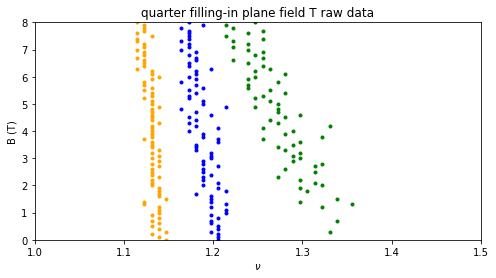

In [83]:
plt.figure(figsize=(8, 4))

plt.plot(peak_quarter_12K[:], B[:], ".", color = 'green') 
plt.plot(peak_quarter_16K[:], B[::-1], ".", color = 'blue')
plt.plot(peak_quarter_22K[:], B[:], ".", color = 'orange')

plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.xlim(1, 1.5)
plt.ylim(0,8)
plt.axis()
plt.title('quarter filling-in plane field T raw data')

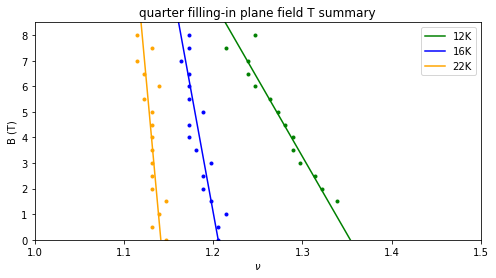

In [84]:
Brev = B[::-1]  

plt.figure(figsize=(8, 4))

peak_quarter_12K_fit = np.zeros(14)
B_fit= np.zeros(14)
for i in range(14):
    plt.plot(peak_quarter_12K[5*i], B[5*i], ".", color = 'green')  
    peak_quarter_12K_fit[i] = peak_quarter_12K[5*i]
    B_fit[i] = B[5*i]
fit = np.polyfit(B_fit[:],peak_quarter_12K_fit[:] ,1)
ffit = np.poly1d(fit)
x = np.linspace(0, 9, 101)
plt.plot(ffit(x), x, color = 'green', label = '12K') 


peak_quarter_16K_fit = np.zeros(17)
Brev_fit= np.zeros(17)
for i in range(17):
    plt.plot(peak_quarter_16K[5*i], Brev[5*i], ".", color = 'blue')  
    peak_quarter_16K_fit[i] = peak_quarter_16K[5*i]
    Brev_fit[i] = Brev[5*i]
fit = np.polyfit(Brev_fit[:],peak_quarter_16K_fit[:] ,1)
ffit = np.poly1d(fit)
x = np.linspace(0, 9, 101)
plt.plot(ffit(x), x, color = 'blue', label = '16K') 

peak_quarter_22K_fit = np.zeros(17)
B_fit= np.zeros(17)
for i in range(17):
    plt.plot(peak_quarter_22K[5*i], B[5*i], ".", color = 'orange')  
    peak_quarter_22K_fit[i] = peak_quarter_22K[5*i]
    B_fit[i] = B[5*i]
fit = np.polyfit(B_fit[:],peak_quarter_22K_fit[:] ,1)
ffit = np.poly1d(fit)
x = np.linspace(0, 9, 101)
plt.plot(ffit(x), x, color = 'orange', label = '22K') 



plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.xlim(1, 1.5)
plt.ylim(0,8.5)
plt.axis()
plt.title('quarter filling-in plane field T summary')
plt.legend()

In [409]:
(vg[173]+0.805)/(0.805+1.6)*4

1.1143451143451144

(0.5, 1.5, 1500, 2700)

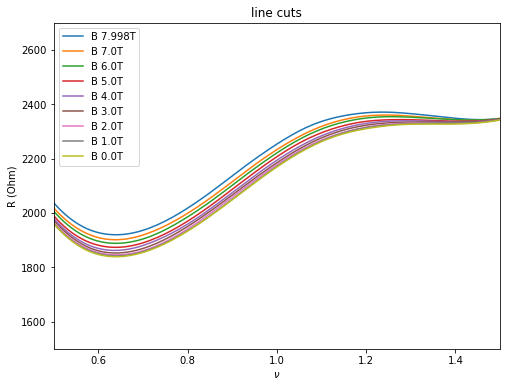

In [400]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='B {}T'.format(B[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')
plt.axis((0.5, 1.5, 1500, 2700))

# 16K in plane field data

In [435]:
data_D0_B_16K = qc.load_data('data/2020-09-10/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_16K_13-56-19')
data_D0_B_16K_2 = qc.load_data('data/2020-09-11/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6p1to8T_fieldgate_16K_03-57-04')
vg = data_D0_B_16K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_16K.triton_field_set_stable_set[:],data_D0_B_16K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_16K, 5e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_16K_2, 5e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_16K, 5e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_16K_2, 5e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_16K, 5e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_16K_2, 5e-9, 'lockin830_2')))

Text(0.5, 1.0, '16K filling-in plane field sweep')

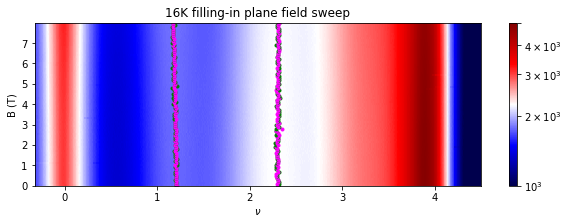

In [445]:
quadpad = 7
quadpadq = 10

plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=1000, vmax=5e3))

# peak_quarter_16K = np.zeros(len(B)) 
# for i in range(len(B)):#half filling
#     peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
#     for f in range(len(peaks)):
#         peak_quarter_16K[i] = (vg[100+peaks[f]]+0.805)/(0.805+1.6)*4
#         plt.plot(peak_quarter_16K[i], B[i], ".", color = 'green')

# peak_half_16K = np.zeros(len(B))          
# for i in range(len(B)):#half filling
#     peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
#     for f in range(len(peaks)):
#         peak_half_16K[i] = (vg[290+peaks[f]]+0.805)/(0.805+1.6)*4
#         plt.plot(peak_half_16K[i], B[i], ".", color = 'green')


peakvbg_quarter_16K = np.zeros(len(B))
peaknu_quarter_16K = np.zeros(len(B))
peakvbg_quarter_16K_2 = np.zeros(len(B))
peaknu_quarter_16K_2 = np.zeros(len(B))
peakB_quarter_16K = np.zeros(len(B))
for i in range(len(B)):#1 quarter
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
    if len(peaks) == 0:
        peakvbg_quarter_16K[i] = np.nan
        peaknu_quarter_16K[i] = np.nan
        peakvbg_quarter_16K_2[i] = np.nan
        peaknu_quarter_16K_2[i] = np.nan
        peakB_quarter_16K[i] = np.nan
    else:
        pind = peaks[0] + 100
        peakvbg_quarter_16K[i] = vg[pind]
        peakB_quarter_16K[i] = B[i]
        peaknu_quarter_16K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_quarter_16K[i], B[i], ".", color = 'green')
        theta = np.polyfit(vg[pind-quadpadq:pind+quadpadq+1], gaussian_filter(Rxx3534[i, pind-quadpadq:pind+quadpadq+1], 1), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_quarter_16K_2[i] = v0
        peaknu_quarter_16K_2[i] = (v0+0.805)/(0.805+1.6)*4
        if peaknu_quarter_16K_2[i] < 1:
            peakvbg_quarter_16K[i] = np.nan
            peaknu_quarter_16K[i] = np.nan
            peakvbg_quarter_16K_2[i] = np.nan
            peaknu_quarter_16K_2[i] = np.nan
            peakB_quarter_16K[i] = np.nan
        else:
            plt.plot(peaknu_quarter_16K_2[i], B[i], '.', color='magenta')

peakvbg_half_16K = np.zeros(len(B))
peaknu_half_16K = np.zeros(len(B))
peakvbg_half_16K_2 = np.zeros(len(B))
peaknu_half_16K_2 = np.zeros(len(B))
peakB_half_16K = np.zeros(len(B))
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
    if len(peaks) == 0:
        peakvbg_half_16K[i] = np.nan
        peaknu_half_16K[i] = np.nan
        peakvbg_half_16K_2[i] = np.nan
        peaknu_half_16K_2[i] = np.nan
        peakB_half_16K_2[i] = np.nan
    else:
        pind = 290 + peaks[0]
        peakvbg_half_16K[i] = vg[pind]
        peaknu_half_16K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_16K[i], B[i], ".", color = 'green')
        peakB_half_16K[i] = B[i]
        theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_half_16K_2[i] = v0
        peaknu_half_16K_2[i] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_16K_2[i], B[i], '.', color='magenta')
        
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
# plt.xlim(2, 2.5)
plt.title('16K filling-in plane field sweep')

In [446]:
np.savetxt('./data/S3_Peak_data/R3534_half_BvsVbgNu_16K.txt', np.vstack((peakB_half_16K, peakvbg_half_16K_2, peaknu_half_16K_2)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/R3534_quarter_BvsVbgNu_16K.txt', np.vstack((peakB_quarter_16K, peakvbg_quarter_16K_2, peaknu_quarter_16K_2)).T, fmt='%.8e')

Text(0.5, 1.0, 'line cuts')

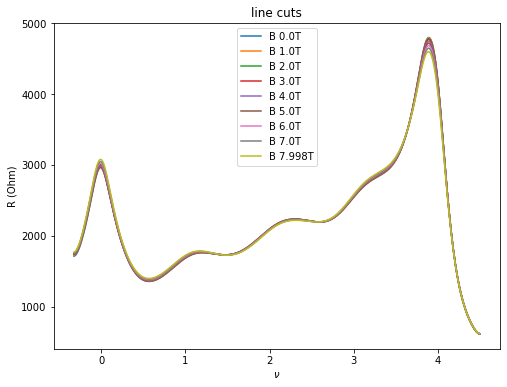

In [75]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='B {}T'.format(B[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

# 22K in plane field data

In [447]:
data_D0_B_22K = qc.load_data('data/2020-09-11/#002_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_8to6p1T_fieldgate_22K_13-57-29')
data_D0_B_22K_2 = qc.load_data('data/2020-09-11/#003_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_22K_23-30-47')
vg = data_D0_B_22K.zeroDparam_set[0, :]
B = np.concatenate((data_D0_B_22K.triton_field_set_stable_set[:],data_D0_B_22K_2.triton_field_set_stable_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_B_22K, 5e-9, 'lockin865'), npd.Rxxfromdata(data_D0_B_22K_2, 5e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_B_22K, 5e-9, 'lockin830'), npd.Rxxfromdata(data_D0_B_22K_2, 5e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_B_22K, 5e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_B_22K_2, 5e-9, 'lockin830_2')))

Text(0.5, 1.0, '22K filling-in plane field sweep')

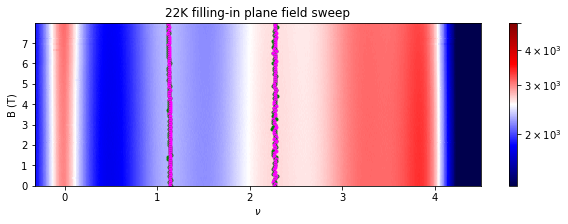

In [453]:
plt.figure(figsize=(10, 3))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, B, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=1300, vmax=5e3))

# peak_quarter_22K = np.zeros(len(B))
# for i in range(len(B)):#half filling
#     peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
#     for f in range(len(peaks)):
#         peak_quarter_22K[i] = (vg[100+peaks[f]]+0.805)/(0.805+1.6)*4
#         plt.plot(peak_quarter_22K[i], B[i], ".", color = 'green')
        
# for i in range(len(B)):#half filling
#     peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
#     for f in range(len(peaks)):
#         plt.plot((vg[290+peaks[f]]+0.805)/(0.805+1.6)*4, B[i], ".", color = 'green')
        

peakvbg_quarter_22K = np.zeros(len(B))
peaknu_quarter_22K = np.zeros(len(B))
peakvbg_quarter_22K_2 = np.zeros(len(B))
peaknu_quarter_22K_2 = np.zeros(len(B))
peakB_quarter_22K = np.zeros(len(B))
for i in range(len(B)):#1 quarter
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 100:300], 2), prominence=0.1, width=8)
    if len(peaks) == 0:
        peakvbg_quarter_22K[i] = np.nan
        peaknu_quarter_22K[i] = np.nan
        peakvbg_quarter_22K_2[i] = np.nan
        peaknu_quarter_22K_2[i] = np.nan
        peakB_quarter_16K[i] = np.nan
    else:
        pind = peaks[0] + 100
        peakvbg_quarter_22K[i] = vg[pind]
        peakB_quarter_22K[i] = B[i]
        peaknu_quarter_22K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_quarter_22K[i], B[i], ".", color = 'green')
        theta = np.polyfit(vg[pind-quadpadq:pind+quadpadq+1], gaussian_filter(Rxx3534[i, pind-quadpadq:pind+quadpadq+1], 1), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_quarter_22K_2[i] = v0
        peaknu_quarter_22K_2[i] = (v0+0.805)/(0.805+1.6)*4
        if peaknu_quarter_22K_2[i] < 1:
            peakvbg_quarter_22K[i] = np.nan
            peaknu_quarter_22K[i] = np.nan
            peakvbg_quarter_22K_2[i] = np.nan
            peaknu_quarter_22K_2[i] = np.nan
            peakB_quarter_22K[i] = np.nan
        else:
            plt.plot(peaknu_quarter_22K_2[i], B[i], '.', color='magenta')

peakvbg_half_22K = np.zeros(len(B))
peaknu_half_22K = np.zeros(len(B))
peakvbg_half_22K_2 = np.zeros(len(B))
peaknu_half_22K_2 = np.zeros(len(B))
peakB_half_22K = np.zeros(len(B))
for i in range(len(B)):#half filling
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 290:350], 2), prominence=0.5, width=10)
    if len(peaks) == 0:
        peakvbg_half_22K[i] = np.nan
        peaknu_half_22K[i] = np.nan
        peakvbg_half_22K_2[i] = np.nan
        peaknu_half_22K_2[i] = np.nan
        peakB_half_22K_2[i] = np.nan
    else:
        pind = 290 + peaks[0]
        peakvbg_half_22K[i] = vg[pind]
        peaknu_half_22K[i] = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_22K[i], B[i], ".", color = 'green')
        peakB_half_22K[i] = B[i]
        theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_half_22K_2[i] = v0
        peaknu_half_22K_2[i] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_22K_2[i], B[i], '.', color='magenta')
        
plt.xlabel(r'$\nu$')
plt.ylabel('B (T)')
plt.colorbar()
# plt.xlim(2, 2.5)
plt.title('22K filling-in plane field sweep')

In [454]:
np.savetxt('./data/S3_Peak_data/R3534_half_BvsVbgNu_22K.txt', np.vstack((peakB_half_22K, peakvbg_half_22K_2, peaknu_half_22K_2)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/R3534_quarter_BvsVbgNu_22K.txt', np.vstack((peakB_quarter_22K, peakvbg_quarter_22K_2, peaknu_quarter_22K_2)).T, fmt='%.8e')

Text(0.5, 1.0, 'line cuts')

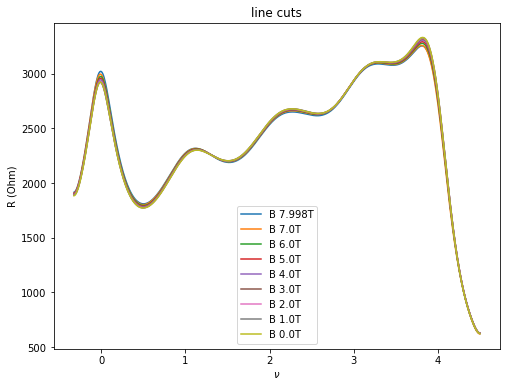

In [78]:
plt.figure(figsize=(8, 6))
for i in range(0, 9):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='B {}T'.format(B[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

# 8T in plane field T dependence

In [554]:
data_D0_T_8T_1 = qc.load_data('data/2020-09-25/#002_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweepto1K_13-02-32')
data_D0_T_8T_2 = qc.load_data('data/2020-09-25/#003_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep1p05to1p4K_18-07-21')
data_D0_T_8T_3 = qc.load_data('data/2020-09-25/#004_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep1p45to2K_20-09-15')
data_D0_T_8T_4 = qc.load_data('data/2020-09-25/#005_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep2p1to10K_23-16-04')
data_D0_T_8T_5 = qc.load_data('data/2020-09-26/#001_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep10p5to25K_20-11-07')
vg = data_D0_T_8T_1.zeroDparam_set[0,:]
T = np.concatenate((data_D0_T_8T_1.triton_pid_setpoint_set[:],data_D0_T_8T_2.triton_pid_setpoint_set[:], data_D0_T_8T_3.triton_pid_setpoint_set[:], data_D0_T_8T_4.triton_pid_setpoint_set[:], data_D0_T_8T_5.triton_pid_setpoint_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_T_8T_1, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_8T_2, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_8T_3, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_8T_4, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_8T_5, 3e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_T_8T_1, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_8T_2, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_8T_3, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_8T_4, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_8T_5, 3e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_T_8T_1, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_8T_2, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_8T_3, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_8T_4, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_8T_5, 3e-9, 'lockin830_2')))

In [555]:
len(T)

150

Text(0.5, 1.0, 'Rxx3534 2D D0-T sweep 8T')

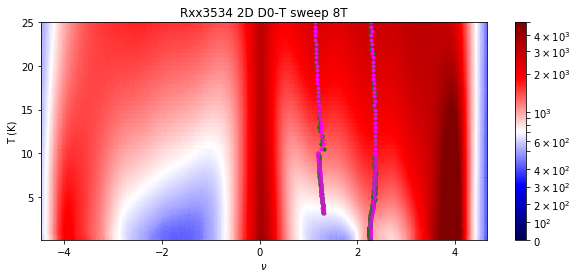

In [575]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=5e3))

peak_quarter_8T_high = np.zeros(len(T)-120)#1/4 high T
for i in range(len(T)-120):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[120+i, 300:380], 2), prominence=0.1, width=8)
    for f in range(len(peaks)):
        peak_quarter_8T_high[i] = (vg[300+peaks[f]]+0.805)/(0.805+1.6)*4
        plt.plot(peak_quarter_8T_high[i], T[120+i], ".", color = 'green')


peak_half_8T = np.zeros(len(T)) #1/2  
for i in range(len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 390:450], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        peak_half_8T[i] = (vg[390+peaks[f]]+0.805)/(0.805+1.6)*4
        plt.plot(peak_half_8T[i], T[i], ".", color = 'green')
        
        
st = 50
peakvbg_quart_8T = np.zeros(len(T) - st)
peaknu_quart_8T = np.zeros(len(T) - st)
peakT_quart_8T = np.zeros(len(T) - st)
for i in range(st,len(T)):#1/2
    if i < 120:
        snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[i, :], 3), n=2), 10)
        peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
        peaks = [peaks[3]-300+2]
    else:
        peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 300:380], 2), prominence=0.1, width=3)
    if len(peaks) == 0:
        peakvbg_quart_8T = np.nan
        peaknu_quart_8T = np.nan
        peakT_quart_8T = np.nan
    else:
        pind = 300 + peaks[0]
        peakT_quart_8T[i-st] = T[i]
        vg0 = vg[pind]
        nu0 = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(nu0, T[i], ".", color = 'green')
        if i < 120:
            theta = np.polyfit(vg[pind-quadpadq:pind+quadpadq+1], snd_diff[pind-quadpadq-2:pind+quadpadq+1-2], 2)
        else:
            theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_quart_8T[i-st] = v0
        peaknu_quart_8T[i-st] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_quart_8T[i-st], T[i], '.', color='magenta')
    
st = 0
peakvbg_half_8T = np.zeros(len(T) - st)
peaknu_half_8T = np.zeros(len(T) - st)
peakT_half_8T = np.zeros(len(T) - st)
for i in range(st,len(T)):#1/2
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 390:450], 2), prominence=0.1, width=3)
    if len(peaks) == 0:
        peakvbg_half_8T = np.nan
        peaknu_half_8T = np.nan
        peakT_half_8T = np.nan
    else:
        pind = 390 + peaks[0]
        peakT_half_8T[i-st] = T[i]
        vg0 = vg[pind]
        nu0 = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(nu0, T[i], ".", color = 'green')
        theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_half_8T[i-st] = v0
        peaknu_half_8T[i-st] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_8T[i-st], T[i], '.', color='magenta')
        
plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
plt.ylim(0.05,25)
# plt.axis((0.9, 1.8, 2, 14))
plt.title('Rxx3534 2D D0-T sweep 8T')

In [576]:
np.savetxt('./data/S3_Peak_data/R3534_half_TvsVbgNu_8T.txt', np.vstack((peakT_half_8T, peakvbg_half_8T, peaknu_half_8T)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/R3534_quarter_TvsVbgNu_8T.txt', np.vstack((peakT_quart_8T, peakvbg_quart_8T, peaknu_quart_8T)).T, fmt='%.8e')

In [557]:
 peak_quarter_8T_low

NameError: name 'peak_quarter_8T_low' is not defined

# 5.5T in plane field T dependence

In [577]:
data_D0_T_5p5T_1 = qc.load_data('data/2020-09-27/#003_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweepto1K_14-31-18')
data_D0_T_5p5T_2 = qc.load_data('data/2020-09-27/#004_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep1p05to1p4K_19-35-42')
data_D0_T_5p5T_3 = qc.load_data('data/2020-09-27/#005_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep1p45to2K_21-37-41')
data_D0_T_5p5T_4 = qc.load_data('data/2020-09-28/#001_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep2p1to10K_00-47-59')
data_D0_T_5p5T_5 = qc.load_data('data/2020-09-28/#002_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep10p5to25K_21-05-33')
vg = data_D0_T_5p5T_1.zeroDparam_set[0,:]
T = np.concatenate((data_D0_T_5p5T_1.triton_pid_setpoint_set[:],data_D0_T_5p5T_2.triton_pid_setpoint_set[:], data_D0_T_5p5T_3.triton_pid_setpoint_set[:], data_D0_T_5p5T_4.triton_pid_setpoint_set[:], data_D0_T_5p5T_5.triton_pid_setpoint_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_T_5p5T_1, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_5p5T_2, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_5p5T_3, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_5p5T_4, 3e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_5p5T_5, 3e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_T_5p5T_1, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_5p5T_2, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_5p5T_3, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_5p5T_4, 3e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_5p5T_5, 3e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_T_5p5T_1, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_5p5T_2, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_5p5T_3, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_5p5T_4, 3e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_5p5T_5, 3e-9, 'lockin830_2')))

In [591]:
T[122]

11.5

Text(0.5, 1.0, 'Rxx3534 2D D0-T sweep 5p5T')

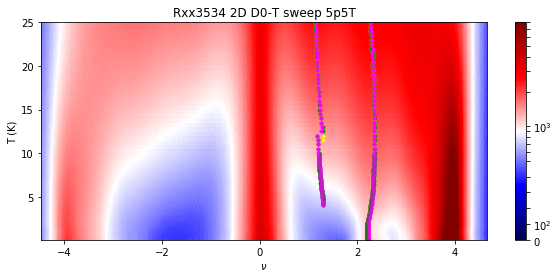

In [593]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg[:]+0.805)/(0.805+1.6)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

peak_quarter_5p5T_high = np.zeros(len(T)-120)#1/4 high T
for i in range(len(T)-120):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[120+i, 300:380], 2), prominence=0.1, width=8)
    for f in range(len(peaks)):
        peak_quarter_5p5T_high[i] = (vg[300+peaks[f]]+0.805)/(0.805+1.6)*4
        plt.plot(peak_quarter_5p5T_high[i], T[120+i], ".", color = 'yellow')
    
peak_half_5p5T = np.zeros(len(T))  
for i in range(len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 390:450], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        peak_half_5p5T[i] = (vg[390+peaks[f]]+0.805)/(0.805+1.6)*4
        plt.plot(peak_half_5p5T[i], T[i], ".", color = 'yellow')
        
        
st = 60
peakvbg_quart_5p5T = np.zeros(len(T) - st)
peaknu_quart_5p5T = np.zeros(len(T) - st)
peakT_quart_5p5T = np.zeros(len(T) - st)
for i in range(st,len(T)):#1/2
    if i < 124:
        snd_diff = gaussian_filter(np.diff(gaussian_filter(Rxx3534[i, :], 3), n=2), 10)
        peaks, _ = find_peaks(-snd_diff, prominence=0.1, width=10)
        peaks = [peaks[3]-300+2]
    else:
        peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 300:380], 2), prominence=0.1, width=5)
    if len(peaks) == 0:
        peakvbg_quart_5p5T = np.nan
        peaknu_quart_5p5T = np.nan
        peakT_quart_5p5T = np.nan
    else:
        pind = 300 + peaks[0]
        peakT_quart_5p5T[i-st] = T[i]
        vg0 = vg[pind]
        nu0 = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(nu0, T[i], ".", color = 'green')
        if i < 124:
            theta = np.polyfit(vg[pind-quadpadq:pind+quadpadq+1], snd_diff[pind-quadpadq-2:pind+quadpadq+1-2], 2)
        else:
            theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_quart_5p5T[i-st] = v0
        peaknu_quart_5p5T[i-st] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_quart_5p5T[i-st], T[i], '.', color='magenta')
    
st = 0
peakvbg_half_5p5T = np.zeros(len(T) - st)
peaknu_half_5p5T = np.zeros(len(T) - st)
peakT_half_5p5T = np.zeros(len(T) - st)
for i in range(st,len(T)):#1/2
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 390:450], 2), prominence=0.1, width=3)
    if len(peaks) == 0:
        peakvbg_half_5p5T = np.nan
        peaknu_half_5p5T = np.nan
        peakT_half_5p5T = np.nan
    else:
        pind = 390 + peaks[0]
        peakT_half_5p5T[i-st] = T[i]
        vg0 = vg[pind]
        nu0 = (vg[pind]+0.805)/(0.805+1.6)*4
        plt.plot(nu0, T[i], ".", color = 'green')
        theta = np.polyfit(vg[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx3534[i, pind-quadpad:pind+quadpad+1], 1.2), 2)
        v0 = -theta[1]/(2*theta[0])
        peakvbg_half_5p5T[i-st] = v0
        peaknu_half_5p5T[i-st] = (v0+0.805)/(0.805+1.6)*4
        plt.plot(peaknu_half_5p5T[i-st], T[i], '.', color='magenta')
        
plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
plt.ylim(0.05,25)
plt.axis()
plt.title('Rxx3534 2D D0-T sweep 5p5T')

In [594]:
np.savetxt('./data/S3_Peak_data/R3534_half_TvsVbgNu_5p5T.txt', np.vstack((peakT_half_5p5T, peakvbg_half_5p5T, peaknu_half_5p5T)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/R3534_quarter_TvsVbgNu_5p5T.txt', np.vstack((peakT_quart_5p5T, peakvbg_quart_5p5T, peaknu_quart_5p5T)).T, fmt='%.8e')

No handles with labels found to put in legend.


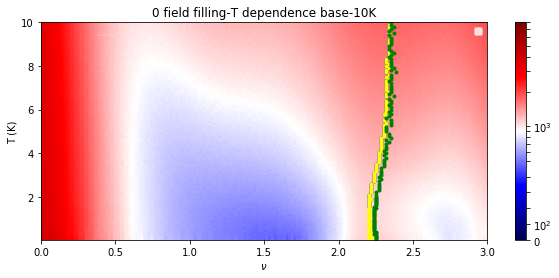

In [92]:
plt.figure(figsize=(10, 4))
plt.pcolormesh((vg+0.79)/(0.79+1.59)*4, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

for i in range(120,len(T)):#1/4 high T
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 300:380], 2), prominence=0.1, width=3)
    for f in range(len(peaks)):
        plt.plot((vg[300+peaks[f]]+0.805)/(0.805+1.6)*4, T[i], ".", color = 'blue')


plt.plot(peak_quarter_5p5T_high[:], T[120:150], ".", color = 'yellow')
plt.plot(peak_quarter_8T_high[:], T[120:150], ".", color = 'green')

for i in range(30,len(T)):#1/2
    peaks, _ = find_peaks(gaussian_filter(Rxx3534[i, 390:450], 2), prominence=0.8, width=10)
    for f in range(len(peaks)):
        plt.plot((vg[390+peaks[f]]+0.805)/(0.805+1.6)*4, T[i], ".", color = 'blue')

plt.plot(peak_half_5p5T[:], T[:150], ".", color = 'yellow')
plt.plot(peak_half_8T[:], T[:150], ".", color = 'green')

plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.xlim(0,3)
plt.ylim(0.025,10)
plt.title('0 field filling-T dependence base-10K')
plt.legend()

Text(0.5, 1.0, 'line cuts')

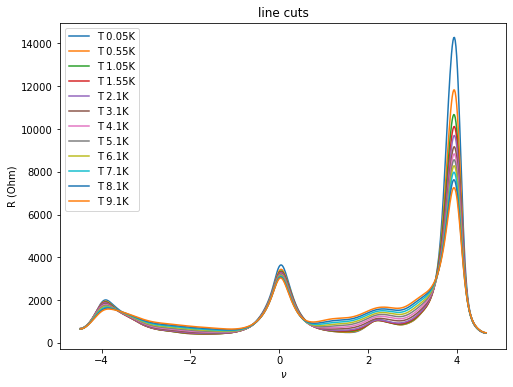

In [93]:
plt.figure(figsize=(8, 6))
for i in range(0, 12):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='T {}K'.format(T[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

Text(0.5, 1.0, 'line cuts')

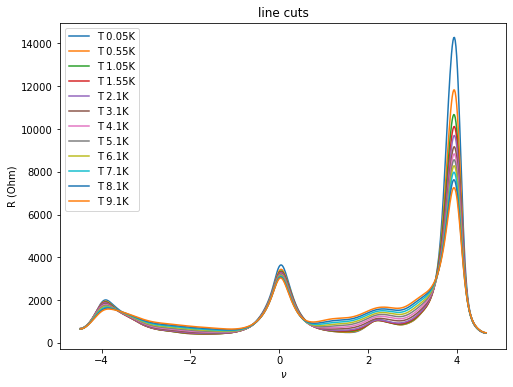

In [94]:
plt.figure(figsize=(8, 6))
for i in range(0, 12):
    indx=10*i 
    plt.plot((vg[:]+0.805)/(0.805+1.6)*4, gaussian_filter(Rxx3534[indx, :], 5), label='T {}K'.format(T[indx]))
plt.legend()
plt.xlabel(r'$\nu$')
plt.ylabel('R (Ohm)')
plt.title('line cuts')

# D0 data

In [59]:
data_D0_T_base = qc.load_data('data/2020-09-05/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_baseT_21-39-49')
data_D0_T_1 = qc.load_data('data/2020-09-05/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweepto1K_21-59-28')
data_D0_T_2 = qc.load_data('data/2020-09-06/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p05to1p4K_08-51-18')
data_D0_T_3 = qc.load_data('data/2020-09-06/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p45to2K_10-53-21')
data_D0_T_4 = qc.load_data('data/2020-09-06/#004_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_2p1to10K_14-00-29')
data_D0_T_5 = qc.load_data('data/2020-09-07/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_10p5to30K_10-15-14')
data_D0_T_6 = qc.load_data('data/2020-09-07/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_30p5to40K_21-03-39')
vg = data_D0_T_base.zeroDparam_set[:]
T = np.concatenate(([0.025], data_D0_T_1.triton_pid_setpoint_set[:],data_D0_T_2.triton_pid_setpoint_set[:], data_D0_T_3.triton_pid_setpoint_set[:], data_D0_T_4.triton_pid_setpoint_set[:], data_D0_T_5.triton_pid_setpoint_set[:], data_D0_T_6.triton_pid_setpoint_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin830_2')))

Text(0.5, 1.0, 'Rxx3534 2D D0-T sweep')

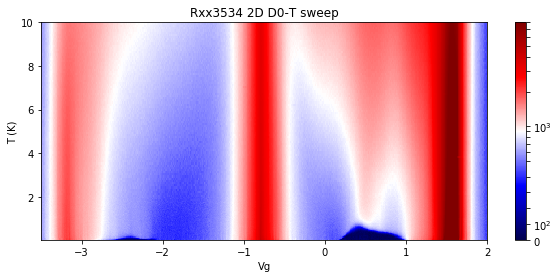

In [60]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

plt.xlabel('Vg')
plt.ylabel('T (K)')
plt.colorbar()
plt.ylim(0.025,10)
plt.axis()
plt.title('Rxx3534 2D D0-T sweep')

# High D field data

In [61]:
data_HighD_T_base = qc.load_data('data/2020-09-19/#004_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_HighD_sweep_baseT_16-29-42')
data_HighD_T_1 = qc.load_data('data/2020-09-19/#005_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweepto1K_16-51-31')
data_HighD_T_2 = qc.load_data('data/2020-09-19/#006_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep1p05to1p4K_21-55-51')
data_HighD_T_3 = qc.load_data('data/2020-09-19/#007_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep1p45to2K_23-57-54')
data_HighD_T_4 = qc.load_data('data/2020-09-20/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep2p1to10K_09-42-10')
data_HighD_T_5 = qc.load_data('data/2020-09-21/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep10p5to30K_06-00-51')
data_HighD_T_6 = qc.load_data('data/2020-09-21/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep30p5to40K_16-48-47')
vg = data_HighD_T_base.highDparam_set[:]
T = np.concatenate(([0.025], data_HighD_T_1.triton_pid_setpoint_set[:],data_HighD_T_2.triton_pid_setpoint_set[:], data_HighD_T_3.triton_pid_setpoint_set[:], data_HighD_T_4.triton_pid_setpoint_set[:], data_HighD_T_5.triton_pid_setpoint_set[:], data_HighD_T_6.triton_pid_setpoint_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_HighD_T_base, 1e-9, 'lockin865'), npd.Rxxfromdata(data_HighD_T_1, 1e-9, 'lockin865'), npd.Rxxfromdata(data_HighD_T_2, 1e-9, 'lockin865'), npd.Rxxfromdata(data_HighD_T_3, 1e-9, 'lockin865'), npd.Rxxfromdata(data_HighD_T_4, 1e-9, 'lockin865'), npd.Rxxfromdata(data_HighD_T_5, 1e-9, 'lockin865'), npd.Rxxfromdata(data_HighD_T_6, 1e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_HighD_T_base, 1e-9, 'lockin830'), npd.Rxxfromdata(data_HighD_T_1, 1e-9, 'lockin830'), npd.Rxxfromdata(data_HighD_T_2, 1e-9, 'lockin830'), npd.Rxxfromdata(data_HighD_T_3, 1e-9, 'lockin830'), npd.Rxxfromdata(data_HighD_T_4, 1e-9, 'lockin830'), npd.Rxxfromdata(data_HighD_T_5, 1e-9, 'lockin830'), npd.Rxxfromdata(data_HighD_T_6, 1e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_HighD_T_base, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_HighD_T_1, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_HighD_T_2, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_HighD_T_3, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_HighD_T_4, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_HighD_T_5, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_HighD_T_6, 1e-9, 'lockin830_2')))

Text(0.5, 1.0, 'Rxx3534 2D HighD-T sweep')

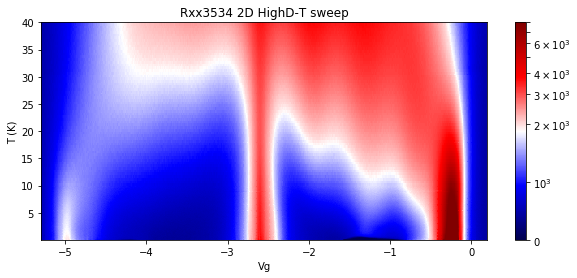

In [62]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(2000,  vmin=0, vmax=8e3))

plt.xlabel('Vg')
plt.ylabel('T (K)')
plt.colorbar()
plt.ylim(0.025,40)
plt.axis()
plt.title('Rxx3534 2D HighD-T sweep')

# low D field data

In [63]:
data_LowD_T_base = qc.load_data('data/2020-09-22/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_lowD_baseT_14-11-39')
data_LowD_T_1 = qc.load_data('data/2020-09-22/#006_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweepto1K_17-52-21')
data_LowD_T_2 = qc.load_data('data/2020-09-22/#007_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep1p05to1p4K_22-56-08')
data_LowD_T_3 = qc.load_data('data/2020-09-23/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep1p45to2K_00-58-08')
data_LowD_T_4 = qc.load_data('data/2020-09-23/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep2p1to10K_09-53-19')
data_LowD_T_5 = qc.load_data('data/2020-09-24/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep10p5to30K_06-12-19')
data_LowD_T_6 = qc.load_data('data/2020-09-24/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep30p5to40K_17-00-33')
vg = data_LowD_T_base.lowD_param_set[:]
T = np.concatenate(([0.025], data_LowD_T_1.triton_pid_setpoint_set[:], data_LowD_T_2.triton_pid_setpoint_set[:], data_LowD_T_3.triton_pid_setpoint_set[:], data_LowD_T_4.triton_pid_setpoint_set[:], data_LowD_T_5.triton_pid_setpoint_set[:], data_LowD_T_6.triton_pid_setpoint_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_LowD_T_base, 1e-9, 'lockin865'), npd.Rxxfromdata(data_LowD_T_1, 1e-9, 'lockin865'), npd.Rxxfromdata(data_LowD_T_2, 1e-9, 'lockin865'), npd.Rxxfromdata(data_LowD_T_3, 1e-9, 'lockin865'), npd.Rxxfromdata(data_LowD_T_4, 1e-9, 'lockin865'), npd.Rxxfromdata(data_LowD_T_5, 1e-9, 'lockin865'), npd.Rxxfromdata(data_LowD_T_6, 1e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_LowD_T_base, 1e-9, 'lockin830'), npd.Rxxfromdata(data_LowD_T_1, 1e-9, 'lockin830'), npd.Rxxfromdata(data_LowD_T_2, 1e-9, 'lockin830'), npd.Rxxfromdata(data_LowD_T_3, 1e-9, 'lockin830'), npd.Rxxfromdata(data_LowD_T_4, 1e-9, 'lockin830'), npd.Rxxfromdata(data_LowD_T_5, 1e-9, 'lockin830'), npd.Rxxfromdata(data_LowD_T_6, 1e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_LowD_T_base, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_LowD_T_1, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_LowD_T_2, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_LowD_T_3, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_LowD_T_4, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_LowD_T_5, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_LowD_T_6, 1e-9, 'lockin830_2')))

Text(0.5, 1.0, 'Rxx3534 2D lowD-T sweep')

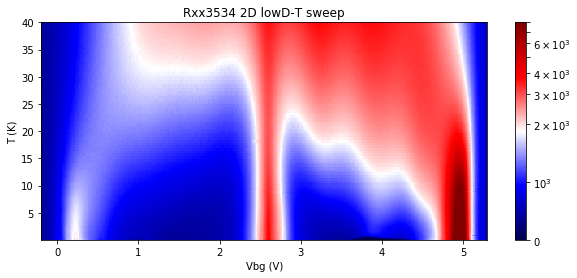

In [64]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3534, cmap='seismic', norm=colors.SymLogNorm(2000,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.ylim(0.025,40)
plt.title('Rxx3534 2D lowD-T sweep')

# 34-33 D0 T dependence

Text(0.5, 1.0, 'Rxx3433 2D D0-T sweep')

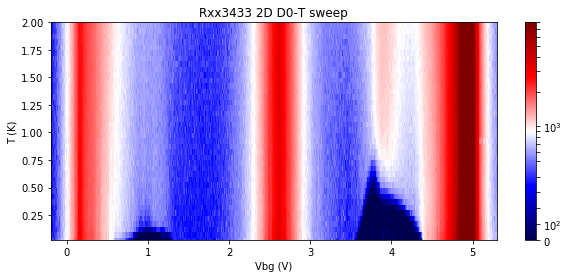

In [65]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3433, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.ylim(0.025,2)
plt.axis()
plt.title('Rxx3433 2D D0-T sweep')

Text(0.5, 1.0, 'Rxx3433 2D D0-T sweep')

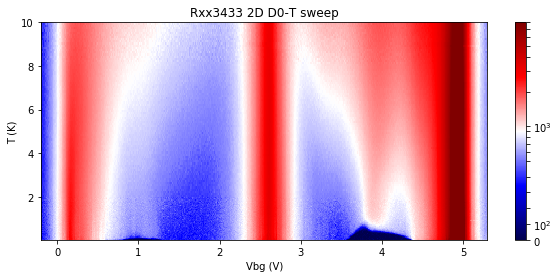

In [66]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3433, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.ylim(0.025,10)
plt.axis()
plt.title('Rxx3433 2D D0-T sweep')

Text(0.5, 1.0, 'Rxx3433 2D D0-T sweep')

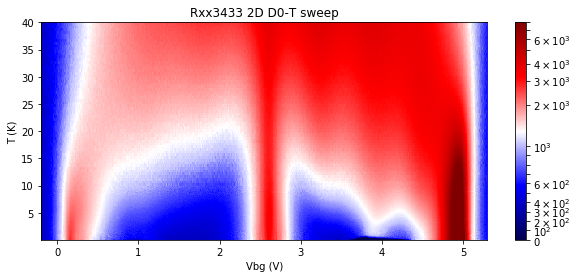

In [67]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx3433, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=0, vmax=8e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx3433 2D D0-T sweep')

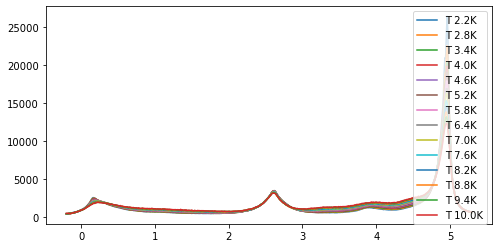

In [68]:
plt.figure(figsize=(8, 4))
for i in range(5, 19):
    indx=6*i + 12
    plt.plot(vg, Rxx3433[indx, :], label='T {}K'.format(T[indx]))
    
plt.legend()

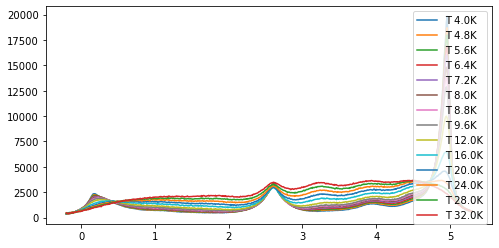

In [69]:
plt.figure(figsize=(8, 4))
for i in range(5, 19):
    indx=8*i + 20
    plt.plot(vg, Rxx3433[indx, :], label='T {}K'.format(T[indx]))
    
plt.legend()

# 40-41 D0 T dependence

Text(0.5, 1.0, 'Rxx4041 2D D0-T sweep')

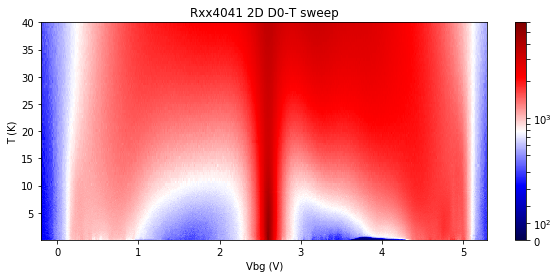

In [70]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx4041, cmap='seismic', norm=colors.SymLogNorm(500,  vmin=0, vmax=6e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx4041 2D D0-T sweep')

Text(0.5, 1.0, 'Rxx4041 2D D0-T sweep')

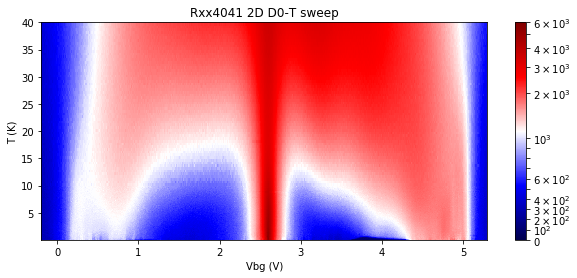

In [71]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(vg, T, Rxx4041, cmap='seismic', norm=colors.SymLogNorm(1000,  vmin=0, vmax=6e3))

plt.xlabel('Vbg (V)')
plt.ylabel('T (K)')
plt.colorbar()
plt.axis()
plt.title('Rxx4041 2D D0-T sweep')

# Fan diagram

In [170]:
fanbase1 = qc.load_data('data/2020-10-21/#017_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_0to6T_fieldgate_13-46-23')
fanbase2 = qc.load_data('data/2020-10-22/#001_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6p05to8T_fieldgate_20-13-47')

vbg = fanbase1.zeroDparam_set[0, :]
B = np.concatenate((fanbase1.triton_field_set_stable_set[:], fanbase2.triton_field_set_stable_set[:]))
Rxxfan3433 = np.vstack((npd.Rxxfromdata(fanbase1, 2e-9, 'lockin830'), npd.Rxxfromdata(fanbase2, 2e-9, 'lockin830')))
Rxxfan3534 = np.vstack((npd.Rxxfromdata(fanbase1, 2e-9, 'lockin865'), npd.Rxxfromdata(fanbase2, 2e-9, 'lockin865')))
Rxxfan4041 = np.vstack((npd.Rxxfromdata(fanbase1, 2e-9, 'lockin830_2'), npd.Rxxfromdata(fanbase2, 2e-9, 'lockin830_2')))

Electrodes 34-33

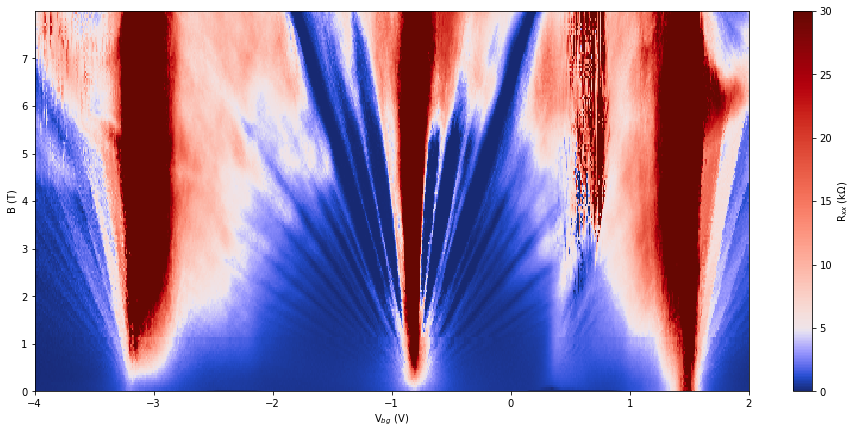

In [171]:
plt.figure(figsize=(16, 7))
plt.pcolormesh(vbg, B, Rxxfan3433/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(5, 0, 30))
plt.xlabel('V$_{bg}$ (V)')
plt.ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')

In [172]:
Rxxfan3433corr = Rxxfan3433.copy()
Rxxfan3433corr[Rxxfan3433 <= 0] = 3

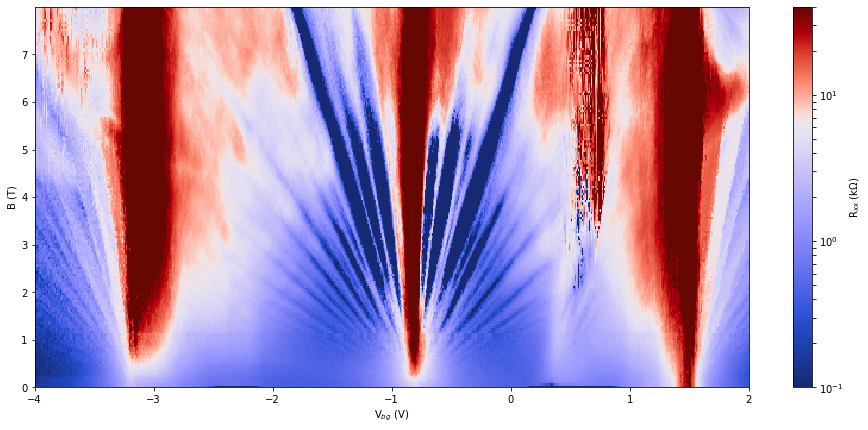

In [173]:
plt.figure(figsize=(16, 7))
plt.pcolormesh(vbg, B, Rxxfan3433corr/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=npd.DivLogNorm(0.7, vmin=0.1, vmax=40))
plt.xlabel('V$_{bg}$ (V)')
plt.ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(ticks=ticker.LogLocator(subs=range(10)), format=ticker.LogFormatterMathtext(), label='R$_{xx}$ (k$\Omega$)')

Need to get rid of 1.05, 1.1 (indices 21, 22)

In [174]:
indices = [x not in (21, 22) for x in range(len(B))]
Rxxfan3433_func = RectBivariateSpline(vbg, B[indices], Rxxfan3433[indices, :].T, kx=1, ky=1)

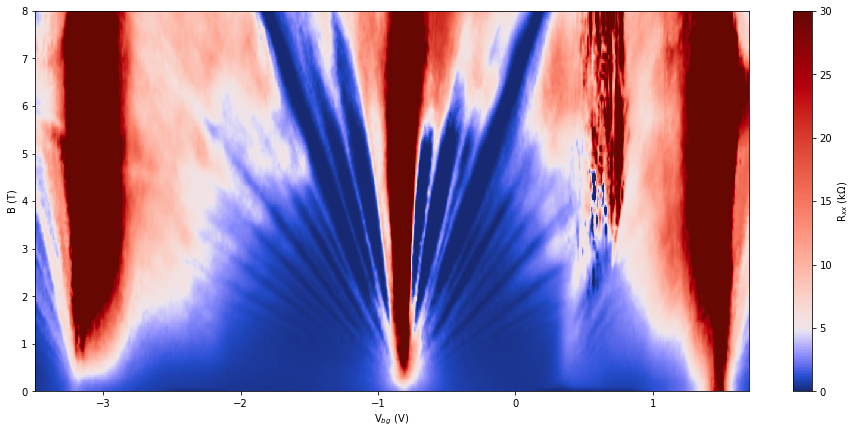

In [175]:
x = np.linspace(-3.5, 1.7, 1200)
y = np.linspace(0, 8, 201)

plt.figure(figsize=(16, 7))
plt.pcolormesh(x, y, gaussian_filter(Rxxfan3433_func(x, y).T, (0.8, 0.8))/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(5, 0, 30))
plt.xlabel('V$_{bg}$ (V)')
plt.ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')

(-4, 2)

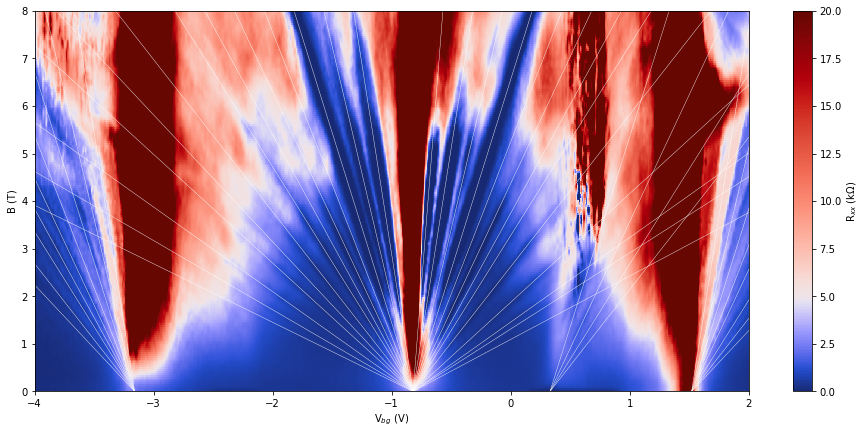

In [176]:
x = np.linspace(-4, 2, 1200)
y = np.linspace(0, 8, 201)

fig, ax = plt.subplots(1, 1, figsize=(16, 7))
p = ax.pcolormesh(x, y, gaussian_filter(Rxxfan3433_func(x, y).T, (0.8, 0.8))/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(5, 0, 20))
ax.set_xlabel('V$_{bg}$ (V)')
ax.set_ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(p, ax=ax, label='R$_{xx}$ (k$\Omega$)')

Bl = 8
Bs = 0
sl = 32
V0 = -0.82
b = -V0*sl
LW = 0.4
# slfill = sl*Vgatefull/4

# CNP
for i in [-26, -22, -18, -14, -12, -10, -8, -7, -6, -5, -4, -3, -2, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 18, 20, 24]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax.plot(x, (x*sl + b)/i, color='white', lw=LW)
    
# negative full filling
V0 = -3.16
b = -V0*sl
LW = 0.4

for i in [ -12, -10, -8, -7, -6, -5, -4, -3, -2]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax.plot(x, (x*sl + b)/i, color='white', lw=LW)
    
# positive full filling
V0 = 1.52
b = -V0*sl
LW = 0.4

for i in [2, 3, 4, 5, 6, 8, 10, 12]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax.plot(x, (x*sl + b)/i, color='white', lw=LW)

# positive half filling
V0 = 0.33
# V0 = 0.44
b = -V0*sl
LW = 0.4

for i in [4, 6, 8, 10]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax.plot(x, (x*sl + b)/i, color='white', lw=LW)
    
ax.set_xlim(-4, 2)

In [177]:
Vgatefull = 1.52 + 0.82

In [178]:
-0.82 + 3.16

2.3400000000000003

In [179]:
(0.33 + 0.82)*2

2.3

In [180]:
a = 0.246e-9
Vgatefull = 2.34
V0 = -0.82
sl = 32
nfull = Vgatefull*sl*1.602e-19/6.626e-34/10**4
theta = np.sqrt(np.sqrt(3)*nfull*10**4*a**2/8)*180/np.pi
print('nfull: {:.3f} *10^12 cm^-2'.format(nfull/10**12))
print('Theta: {:.3f} degrees'.format(theta))

nfull: 1.810 *10^12 cm^-2
Theta: 0.882 degrees


In [181]:
nufan3433 = np.interp(vbg, [V0 - 6/4*Vgatefull, V0 + 6/4*Vgatefull], [-6, 6])
indices = [x not in (21, 22) for x in range(len(B))]
Rxxfan3433_func = RectBivariateSpline(nufan3433, B[indices], Rxxfan3433corr[indices, :].T, kx=1, ky=1)

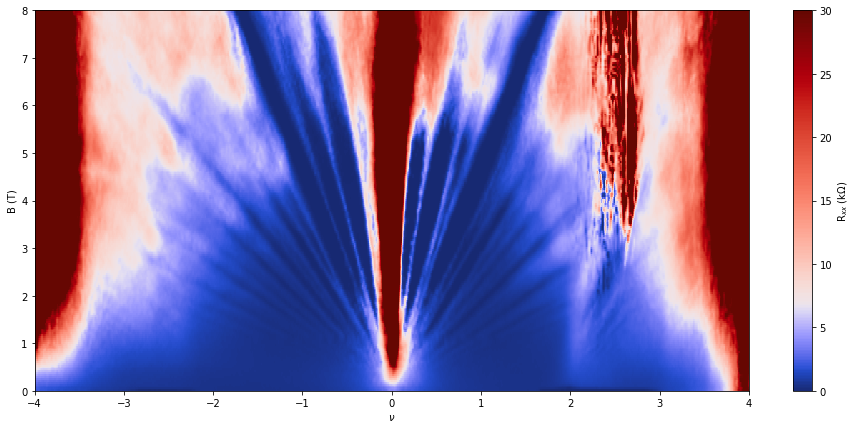

In [186]:
x = np.linspace(-4, 4, 1000)
y = np.linspace(0, 8, 201)

plt.figure(figsize=(16, 7))
plt.pcolormesh(x, y, gaussian_filter(Rxxfan3433_func(x, y).T, (0.6, 0.6))/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(7, 0, 30))
plt.xlabel('$\\nu$')
plt.ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')

Compare to 35-34

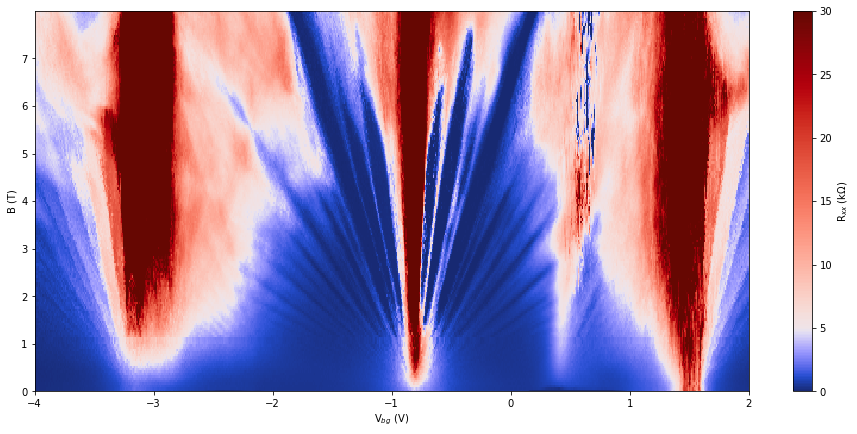

In [183]:
plt.figure(figsize=(16, 7))
plt.pcolormesh(vbg, B, Rxxfan3534/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(5, 0, 30))
plt.xlabel('V$_{bg}$ (V)')
plt.ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')

In [184]:
Rxxfan3534corr = Rxxfan3534.copy()
Rxxfan3534corr[Rxxfan3534 <= 0] = 3

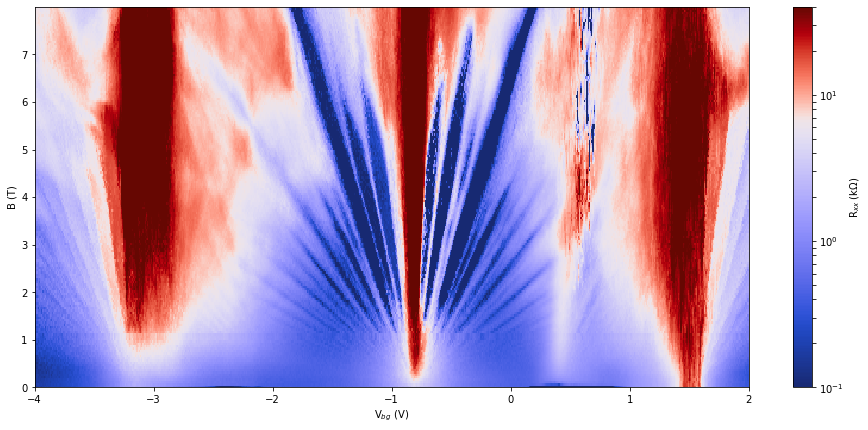

In [185]:
plt.figure(figsize=(16, 7))
plt.pcolormesh(vbg, B, Rxxfan3534corr/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=npd.DivLogNorm(0.7, vmin=0.1, vmax=40))
plt.xlabel('V$_{bg}$ (V)')
plt.ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(ticks=ticker.LogLocator(subs=range(10)), format=ticker.LogFormatterMathtext(), label='R$_{xx}$ (k$\Omega$)')

In [200]:
indices = [x not in (21, 22) for x in range(len(B))]
Rxxfan3534_func = RectBivariateSpline(vbg, B[indices], Rxxfan3534corr[indices, :].T, kx=1, ky=1)

(-4, 2)

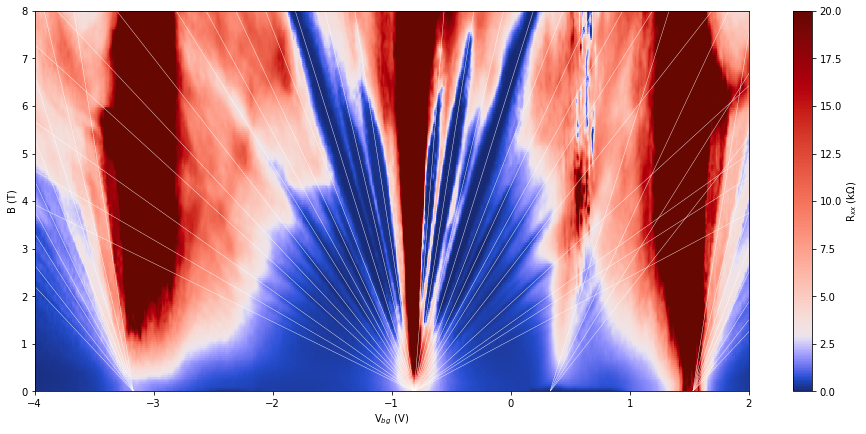

In [216]:
x = np.linspace(-4, 2, 1200)
y = np.linspace(0, 8, 201)

fig, ax = plt.subplots(1, 1, figsize=(16, 7))
p = ax.pcolormesh(x, y, gaussian_filter(Rxxfan3534_func(x, y).T, (0.8, 0.8))/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(3, 0, 20))
ax.set_xlabel('V$_{bg}$ (V)')
ax.set_ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(p, ax=ax, label='R$_{xx}$ (k$\Omega$)')

Bl = 8
Bs = 0
sl = 32
V0 = -0.81
b = -V0*sl
LW = 0.4
# slfill = sl*Vgatefull/4

# CNP
for i in [-26, -22, -18, -14, -12, -10, -8, -7, -6, -5, -4, -3, -2, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 18, 20, 24]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax.plot(x, (x*sl + b)/i, color='white', lw=LW)
    
# negative full filling
V0 = -3.17
b = -V0*sl
LW = 0.4

for i in [ -12, -10, -8, -7, -6, -5, -4, -3, -2]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax.plot(x, (x*sl + b)/i, color='white', lw=LW)
    
# positive full filling
V0 = 1.53
b = -V0*sl
LW = 0.4

for i in [2, 3, 4, 5, 6, 8, 10, 12]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax.plot(x, (x*sl + b)/i, color='white', lw=LW)

# positive half filling
V0 = 0.33
# V0 = 0.44
b = -V0*sl
LW = 0.4

for i in [4, 6, 8, 10]:
    x = np.linspace((Bs*i - b)/sl, (Bl*i - b)/sl, 10)
    ax.plot(x, (x*sl + b)/i, color='white', lw=LW)
    
ax.set_xlim(-4, 2)

In [220]:
1.53 + 0.81

2.34

In [221]:
-0.81 + 3.17

2.36

In [222]:
Vgatefull = (1.53 + 3.17)/2
print(Vgatefull)

sl = 32
nfull = Vgatefull*sl*1.602e-19/6.626e-34/10**4
theta = np.sqrt(np.sqrt(3)*nfull*10**4*a**2/8)*180/np.pi
print('nfull: {:.3f} *10^12 cm^-2'.format(nfull/10**12))
print('Theta: {:.3f} degrees'.format(theta))

2.35
nfull: 1.818 *10^12 cm^-2
Theta: 0.884 degrees


## 3K diagram

In [187]:
dfan3 = qc.load_data('data/2020-10-24/#002_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6to0T_fieldgate_3K_16-15-04')
dfan3_2 = qc.load_data('data/2020-10-25/#001_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6p1to8T_fieldgate_3K_04-34-52')

Vgatefull = 2.34
V0 = -0.82

vbg3 = dfan3.zeroDparam_set[0, :]
nubg3 = np.interp(vbg3, [V0 - Vgatefull*6/4, V0 + Vgatefull*6/4], [-6, 6])
Bfan3 = np.concatenate((dfan3.triton_field_set_stable_set[:], dfan3_2.triton_field_set_stable_set[:]))
Rxxfan3 = np.vstack((npd.Rxxfromdata(dfan3, 2e-9, 'lockin830'), npd.Rxxfromdata(dfan3_2, 2e-9, 'lockin830')))

In [192]:
Bfan3[10]

1.0

(-2, -0.8, 0, 3000)

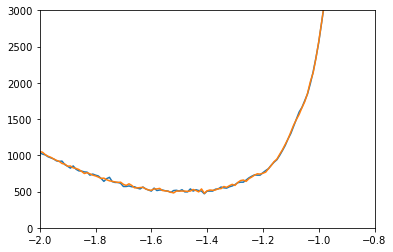

In [197]:
plt.figure()
# plt.plot(vbg3, Rxxfan3[8, :])
# plt.plot(vbg3, Rxxfan3[9, :])
plt.plot(vbg3, Rxxfan3[10, :])
plt.plot(vbg3, Rxxfan3[11, :])
plt.axis((-2, -0.8, 0, 3000))

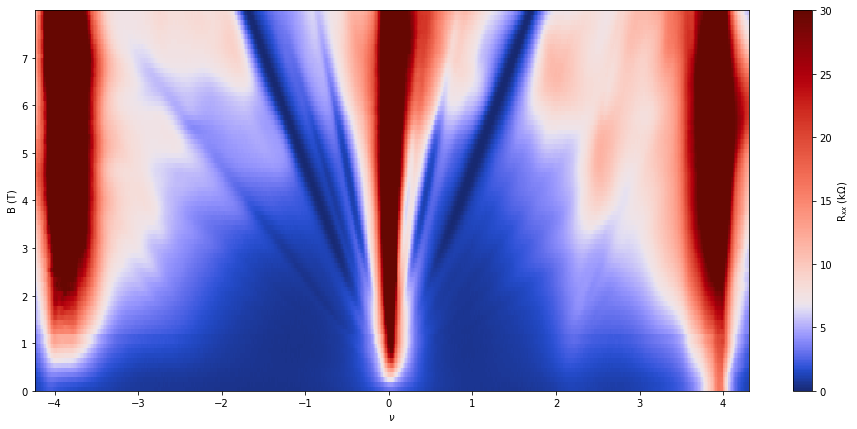

In [195]:
# x = np.linspace(-4, 4, 1000)
# y = np.linspace(0, 8, 201)

plt.figure(figsize=(16, 7))
plt.pcolormesh(nubg3, Bfan3, Rxxfan3/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(7, 0, 30))
plt.xlabel('$\\nu$')
plt.ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')

## 5K

In [198]:
dfan5 = qc.load_data('data/2020-10-23/#002_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_8to6p1T_fieldgate_5K_15-55-01')
dfan5_2 = qc.load_data('data/2020-10-24/#001_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6to0T_fieldgate_5K_00-54-34')

Vgatefull = 2.34
V0 = -0.82

vbg5 = dfan5.zeroDparam_set[0, :]
nubg5 = np.interp(vbg5, [V0 - Vgatefull*6/4, V0 + Vgatefull*6/4], [-6, 6])
Bfan5 = np.concatenate((dfan5.triton_field_set_stable_set[:], dfan5_2.triton_field_set_stable_set[:]))
Rxxfan5 = np.vstack((npd.Rxxfromdata(dfan5, 2e-9, 'lockin830'), npd.Rxxfromdata(dfan5_2, 2e-9, 'lockin830')))

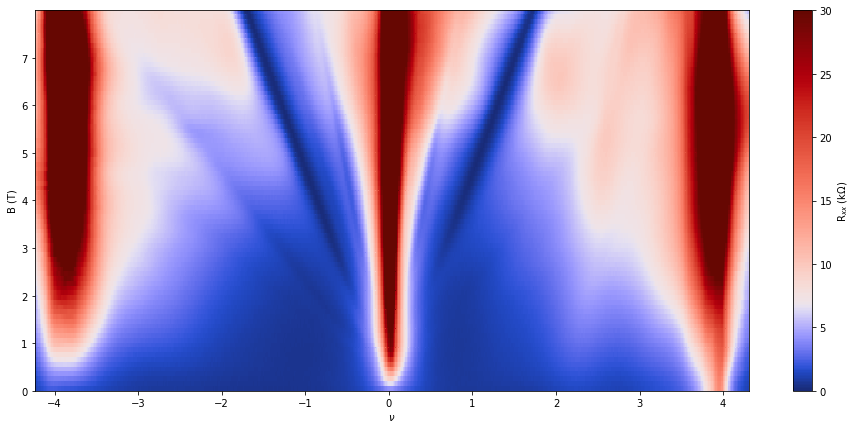

In [199]:
plt.figure(figsize=(16, 7))
plt.pcolormesh(nubg5, Bfan5, Rxxfan5/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(7, 0, 30))
plt.xlabel('$\\nu$')
plt.ylabel('B (T)')
# plt.ylim(0, 4)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')

# W3 peak characterization

There are peaks here at +/- 1, 2

In [28]:
sl = -15.1
C = -sl*1.602e-19**2/6.626e-34
dBN = 3*8.85e-12/C
V0 = 0.21
# Vhp = 4.24
Vgatefull = 7.64
print('effective capacitance: {:.4e}'.format(C))
print('effective hBN thickness: {:.1f} nm'.format(dBN*10**9))

effective capacitance: 5.8486e-04
effective hBN thickness: 45.4 nm


In [29]:
print('Full filling voltage difference: {}'.format(Vgatefull))
nfull = (Vgatefull)*C/1.602e-19/10**4
print(nfull/10**12) #10**12 cm^-2
a = 0.246e-9

theta = np.sqrt(np.sqrt(3)*nfull*10**4*a**2/8)*180/np.pi
print('theta: ', theta)

Full filling voltage difference: 7.64
2.78921110775732
theta:  1.0953016773036148


In [30]:
dT_0 = qc.load_data('data/2020-10-01/#003_W3_865_7-8_830_8-9_baseT_2nA_gatesweep_11-01-21')
dT_1 = qc.load_data('data/2020-10-01/#004_W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweepto1K_11-21-17')
dT_2 = qc.load_data('data/2020-10-01/#005_W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep1p05to1p4K_15-46-08')
dT_3 = qc.load_data('data/2020-10-01/#006_W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep1p45to2K_17-32-28')
dT_4 = qc.load_data('data/2020-10-01/#007_W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep2p1to10K_22-01-42')
dT_5 = qc.load_data('data/2020-10-02/#001_W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep10p5to30K_15-37-29')
dT_6 = qc.load_data('data/2020-10-03/#001_W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep30p5to40K_01-05-40')

vg = dT_0.srframe_volt_p1_set[:491]
T = np.concatenate(([0.025], dT_1.triton_pid_setpoint_set[:], dT_2.triton_pid_setpoint_set[:], dT_3.triton_pid_setpoint_set[:], dT_4.triton_pid_setpoint_set[:], dT_5.triton_pid_setpoint_set[:], dT_6.triton_pid_setpoint_set[:]))
Rxx78 = np.vstack((npd.Rxxfromdata(dT_0, 1e-9, 'lockin865')[:491], npd.Rxxfromdata(dT_1, 1e-9, 'lockin865'), npd.Rxxfromdata(dT_2, 1e-9, 'lockin865'), npd.Rxxfromdata(dT_3, 1e-9, 'lockin865'), npd.Rxxfromdata(dT_4, 1e-9, 'lockin865'), npd.Rxxfromdata(dT_5, 1e-9, 'lockin865'), npd.Rxxfromdata(dT_6, 1e-9, 'lockin865')))
Rxx89 = np.vstack((npd.Rxxfromdata(dT_0, 1e-9, 'lockin830')[:491], npd.Rxxfromdata(dT_1, 1e-9, 'lockin830'), npd.Rxxfromdata(dT_2, 1e-9, 'lockin830'), npd.Rxxfromdata(dT_3, 1e-9, 'lockin830'), npd.Rxxfromdata(dT_4, 1e-9, 'lockin830'), npd.Rxxfromdata(dT_5, 1e-9, 'lockin830'), npd.Rxxfromdata(dT_6, 1e-9, 'lockin830')))

In [31]:
nu78 = np.interp(vg, [V0 - Vgatefull, V0 + Vgatefull], [-4, 4])

Text(0, 0.5, 'T (K)')

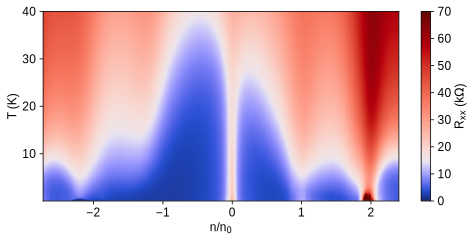

In [32]:
msize = 4

plt.figure(figsize=(8, 3.5))
plt.pcolormesh(nu78, T, Rxx78/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(15, 0, 70), rasterized=True)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')

# plt.plot(nuhalf, halfT, '.', ms=msize, color='green')
# plt.plot(nuquarter, quarterT, '.', ms=msize, color='purple')

plt.xlabel('n/n$_0$')
plt.ylabel('T (K)')

# plt.xlim(-0.2, 0.2)

# plt.savefig(figfile + 'W3_Pomeranchuk_Tdep_7-8.svg', dpi=300, bbox_inches='tight')

In [33]:
nu78[50]

-2.2041884816753927

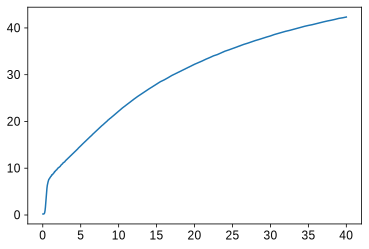

In [34]:
plt.figure()
plt.plot(T, Rxx78[:, 48]/1000)

In [35]:
Rxx78.shape

(181, 491)

In [36]:
nu78[65]

-2.0471204188481678

Text(0.5, 1.0, '0 field filling-T dependence base-40K')

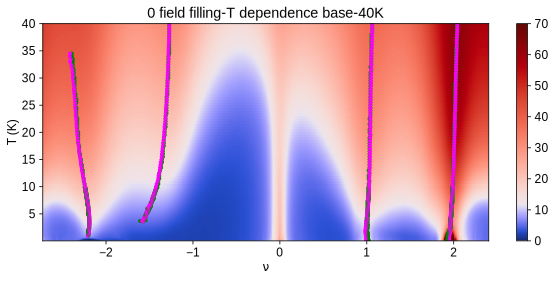

In [37]:
quadpad = 8
quadpadq = 7

plt.figure(figsize=(10, 4))
plt.pcolormesh(nu78, T, Rxx78/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(12, 0, 70), rasterized=True)

# positive 1/4
st = 0
peaknu_quart_0T = np.zeros(len(T) - st)
peakT_quart_0T = np.zeros(len(T) - st)
for i in range(st,len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx78[i, 320:390], 2), prominence=0.1, width=3)
    if len(peaks) == 0:
        peaknu_quart_0T[i-st] = np.nan
        peakT_quart_0T[i-st] = np.nan
    else:
        pind = 320 + peaks[0]
        peakT_quart_0T[i-st] = T[i]
        nu0 = nu78[pind]
        plt.plot(nu0, T[i], ".", color = 'green')
        theta = np.polyfit(nu78[pind-quadpadq:pind+quadpadq+1], gaussian_filter(Rxx78[i, pind-quadpadq:pind+quadpadq+1], 2), 2)
        nu0 = -theta[1]/(2*theta[0])
        peaknu_quart_0T[i-st] = nu0
        plt.plot(peaknu_quart_0T[i-st], T[i], '.', color='magenta')

# negative 1/4
st = 56
peaknu_nquart_0T = np.zeros(len(T) - st)
peakT_nquart_0T = np.zeros(len(T) - st)
for i in range(st,len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx78[i, 85:180], 2), prominence=0.1, width=3)
    if len(peaks) == 0:
        peaknu_nquart_0T[i-st] = np.nan
        peakT_nquart_0T[i-st] = np.nan
    else:
        pind = 85 + peaks[0]
        peakT_nquart_0T[i-st] = T[i]
        nu0 = nu78[pind]
        plt.plot(nu0, T[i], ".", color = 'green')
        theta = np.polyfit(nu78[pind-quadpadq:pind+quadpadq+1], gaussian_filter(Rxx78[i, pind-quadpadq:pind+quadpadq+1], 2), 2)
        nu0 = -theta[1]/(2*theta[0])
        peaknu_nquart_0T[i-st] = nu0
        plt.plot(peaknu_nquart_0T[i-st], T[i], '.', color='magenta')

# positive 1/2
st = 0
peaknu_half_0T = np.zeros(len(T) - st)
peakT_half_0T = np.zeros(len(T) - st)
for i in range(st,len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx78[i, 410:480], 2), prominence=0.1, width=3)
    if len(peaks) == 0:
        peaknu_half_0T[i-st] = np.nan
        peakT_half_0T[i-st] = np.nan
    else:
        pind = 410 + peaks[0]
        peakT_half_0T[i-st] = T[i]
        nu0 = nu78[pind]
        plt.plot(nu0, T[i], ".", color = 'green')
        theta = np.polyfit(nu78[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx78[i, pind-quadpad:pind+quadpad+1], 2), 2)
        nu0 = -theta[1]/(2*theta[0])
        peaknu_half_0T[i-st] = nu0
        plt.plot(peaknu_half_0T[i-st], T[i], '.', color='magenta')
        
# negative 1/2
st = 20
peaknu_nhalf_0T = np.zeros(len(T) - st)
peakT_nhalf_0T = np.zeros(len(T) - st)
for i in range(st,len(T)):
    peaks, _ = find_peaks(gaussian_filter(Rxx78[i, 15:65], 2), prominence=0.1, width=4)
    if len(peaks) == 0:
        peaknu_nhalf_0T[i-st] = np.nan
        peakT_nhalf_0T[i-st] = np.nan
    else:
        pind = 15 + peaks[0]
        peakT_nhalf_0T[i-st] = T[i]
        nu0 = nu78[pind]
        plt.plot(nu0, T[i], ".", color = 'green')
        theta = np.polyfit(nu78[pind-quadpad:pind+quadpad+1], gaussian_filter(Rxx78[i, pind-quadpad:pind+quadpad+1], 2), 2)
        nu0 = -theta[1]/(2*theta[0])
        peaknu_nhalf_0T[i-st] = nu0
        plt.plot(peaknu_nhalf_0T[i-st], T[i], '.', color='magenta')
    

plt.xlabel(r'$\nu$')
plt.ylabel('T (K)')
plt.colorbar()
# plt.xlim(-0.1, 1.8)
# plt.ylim(5, 18)
plt.title('0 field filling-T dependence base-40K')

# plt.xlim(-2, -1)

For this one, I just plotted nu rather than vbg

In [105]:
np.savetxt('./data/S3_Peak_data/W3_R78_poshalf_TvsNu_0T.txt', np.vstack((peakT_half_0T, peaknu_half_0T)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/W3_R78_posquarter_TvsNu_0T.txt', np.vstack((peakT_quart_0T, peaknu_quart_0T)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/W3_R78_neghalf_TvsNu_0T.txt', np.vstack((peakT_nhalf_0T, peaknu_nhalf_0T)).T, fmt='%.8e')
np.savetxt('./data/S3_Peak_data/W3_R78_negquarter_TvsNu_0T.txt', np.vstack((peakT_nquart_0T, peaknu_nquart_0T)).T, fmt='%.8e')

In [90]:
T[55]

3.5

(-3, 0, 0, 50)

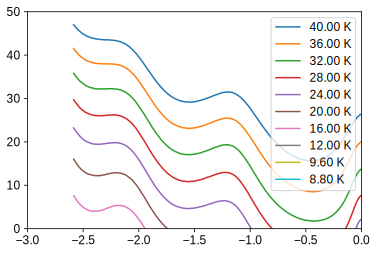

In [97]:
plt.figure()
for i in range(10):
    indx = -i*8 -1
    plt.plot(nu78, Rxx78[indx, :]/1000 - i*4, label='{:.2f} K'.format(T[indx]))
    
plt.legend()

plt.axis((-3, 0, 0, 50))